In [219]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import linregress
import calendar
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# Importing Datasets

business = pd.read_csv("3.1-data-sheet-udemy-courses-business-courses.csv")
design = pd.read_csv("3.1-data-sheet-udemy-courses-design-courses.csv")
music = pd.read_csv("3.1-data-sheet-udemy-courses-music-courses.csv")
web = pd.read_csv("3.1-data-sheet-udemy-courses-web-development.csv")

all_courses = pd.read_csv("Entry Level Project Sheet - 3.1-data-sheet-udemy-courses-web-development.csv")

# Data Description

Datasets' columns and first 5 rows

In [221]:
print(business.columns)
business.head()

Index(['course_id', 'course_title', 'url', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'Rating', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')


course_id                                       course_title  \
0    49798.0  Bitcoin or How I Learned to Stop Worrying and ...   
1    48841.0    Accounting in 60 Minutes - A Brief Introduction   
2   133536.0               Stock Market Investing for Beginners   
3   151668.0                 Introduction to Financial Modeling   
4   648826.0         The Complete Financial Analyst Course 2017   

                                                 url  price  num_subscribers  \
0  https://www.udemy.com/bitcoin-or-how-i-learned...    0.0          65576.0   
1  https://www.udemy.com/accounting-in-60-minutes...    0.0          56659.0   
2  https://www.udemy.com/the-beginners-guide-to-t...    0.0          50855.0   
3  https://www.udemy.com/financial-modeling-asimp...    0.0          29167.0   
4  https://www.udemy.com/the-complete-financial-a...  195.0          24481.0   

   num_reviews  num_lectures           level  Rating  content_duration  \
0        936.0          24.0      All Levels    0.56               8.0   
1       4397.0          16.0  Beginner Level    0.95               1.5   
2       2698.0          15.0      All Levels    0.91               1.5   
3       1463.0           8.0      All Levels    0.18               1.5   
4       2347.0         174.0      All Levels    0.37              10.0   

    published_timestamp           subject  
0  2013-04-20T02:25:22Z  Business Finance  
1  2013-04-07T21:39:25Z  Business Finance  
2  2013-12-25T19:53:34Z  Business Finance  
3  2014-05-27T16:22:16Z  Business Finance  
4  2016-01-21T01:38:48Z  Business Finance

In [222]:
print(web.columns)
web.head()

Index(['course_id', 'course_title', 'url', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'Rating', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')


course_id                                       course_title  \
0    41295.0               Learn HTML5 Programming From Scratch   
1    59014.0                     Coding for Entrepreneurs Basic   
2   625204.0                         The Web Developer Bootcamp   
3   173548.0  Build Your First Website in 1 Week with HTML5 ...   
4   764164.0              The Complete Web Developer Course 2.0   

                                                 url  price  num_subscribers  \
0  https://www.udemy.com/learn-html5-programming-...    0.0         268923.0   
1  https://www.udemy.com/coding-for-entrepreneurs...    0.0         161029.0   
2  https://www.udemy.com/the-web-developer-bootcamp/  200.0         121584.0   
3  https://www.udemy.com/build-your-first-website...    0.0         120291.0   
4  https://www.udemy.com/the-complete-web-develop...  200.0         114512.0   

   num_reviews  num_lectures           level  Rating  content_duration  \
0       8629.0          45.0  Beginner Level    0.82              10.5   
1        279.0          27.0    Expert Level    0.69               3.5   
2      27445.0         342.0  Beginner Level    0.89              43.0   
3       5924.0          30.0      All Levels    0.78               3.0   
4      22412.0         304.0  Beginner Level    0.55              30.5   

    published_timestamp                   subject  
0  2013-02-14T07:03:41Z  Subject: Web Development  
1  2013-06-09T15:51:55Z  Subject: Web Development  
2  2015-11-02T21:13:27Z  Subject: Web Development  
3  2014-04-08T16:21:30Z  Subject: Web Development  
4  2016-03-08T22:28:36Z  Subject: Web Development

In [223]:
print(design.columns)
design.head()

Index(['course_id', 'course_title', 'url', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'Rating', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')


course_id                                       course_title  \
0   348116.0  Photoshop In-Depth: Master all of Photoshop's ...   
1    17349.0  Figure Drawing From Life Using The Reilly Tech...   
2   399938.0      Professional Logo Design in Adobe Illustrator   
3   820194.0  Photoshop for Entrepreneurs - Design 11 Practi...   
4   249126.0                             Logo Design Essentials   

                                                 url  price  num_subscribers  \
0             https://www.udemy.com/photoshop-tools/    0.0          53851.0   
1  https://www.udemy.com/figure-drawing-from-life...    0.0          47811.0   
2  https://www.udemy.com/professional-logo-design...    0.0          44044.0   
3  https://www.udemy.com/photoshop-for-entreprene...  200.0          36288.0   
4                 https://www.udemy.com/logo-design/   20.0          33205.0   

   num_reviews  num_lectures           level  Rating  content_duration  \
0       1779.0          45.0      All Levels    0.69               4.5   
1       1041.0          22.0  Beginner Level    0.11               2.5   
2       1563.0          45.0  Beginner Level    0.89               7.5   
3        737.0          63.0      All Levels    0.96               5.0   
4        481.0          12.0  Beginner Level    0.88               0.7   

    published_timestamp         subject  
0  2014-11-30T04:22:11Z  Graphic Design  
1  2012-05-09T18:14:57Z  Graphic Design  
2  2015-01-22T11:18:06Z  Graphic Design  
3  2016-06-09T01:57:03Z  Graphic Design  
4  2014-06-30T03:09:27Z  Graphic Design

In [224]:
print(music.columns)
music.head()

Index(['course_id', 'course_title', 'url', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'Rating', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')


course_id                                       course_title  \
0      19421              Free Beginner Electric Guitar Lessons   
1     238934  Pianoforall - Incredible New Way To Learn Pian...   
2      41884                Getting Started with Playing Guitar   
3      42271      Complete Guitar System - Beginner to Advanced   
4      26956                            Learn Guitar in 21 Days   

                                                 url  price  num_subscribers  \
0  https://www.udemy.com/beginner-electric-guitar...      0           101154   
1  https://www.udemy.com/pianoforall-incredible-n...    200            75499   
2  https://www.udemy.com/getting-started-with-pla...      0            47652   
3  https://www.udemy.com/complete-guitar-system-b...    145            32935   
4     https://www.udemy.com/learn-guitar-in-21-days/     20            26504   

   num_reviews  num_lectures           level  Rating  content_duration  \
0         1042            95      All Levels    0.88               4.5   
1         7676           362  Beginner Level    0.96              30.0   
2         1141            26      All Levels    0.68               4.0   
3         2713           310      All Levels    0.65              34.0   
4          192            82      All Levels    0.41               2.5   

    published_timestamp              subject  
0  2012-06-15T17:00:33Z  Musical Instruments  
1  2014-08-07T06:27:51Z  Musical Instruments  
2  2013-05-29T15:28:07Z  Musical Instruments  
3  2013-05-29T15:24:47Z  Musical Instruments  
4  2012-10-21T20:36:50Z  Musical Instruments

In [225]:
print(all_courses.columns)
all_courses.head()

Index(['course_id', 'course_title', 'url', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'rating', 'content_duration',
       'published_timestamp', 'subject', 'Date', 'Free/Paid'],
      dtype='object')


course_id                                       course_title  \
0      41295               Learn HTML5 Programming From Scratch   
1      59014                     Coding for Entrepreneurs Basic   
2     625204                         The Web Developer Bootcamp   
3     173548  Build Your First Website in 1 Week with HTML5 ...   
4     764164              The Complete Web Developer Course 2.0   

                                                 url  price  num_subscribers  \
0  https://www.udemy.com/learn-html5-programming-...      0           268923   
1  https://www.udemy.com/coding-for-entrepreneurs...      0           161029   
2  https://www.udemy.com/the-web-developer-bootcamp/    200           121584   
3  https://www.udemy.com/build-your-first-website...      0           120291   
4  https://www.udemy.com/the-complete-web-develop...    200           114512   

   num_reviews  num_lectures           level  rating  content_duration  \
0         8629            45  Beginner Level    0.82              10.5   
1          279            27    Expert Level    0.69               3.5   
2        27445           342  Beginner Level    0.89              43.0   
3         5924            30      All Levels    0.78               3.0   
4        22412           304  Beginner Level    0.55              30.5   

    published_timestamp          subject        Date Free/Paid  
0  2013-02-14T07:03:41Z  Web Development  2013-02-14      Free  
1  2013-06-09T15:51:55Z  Web Development  2013-06-09      Free  
2  2015-11-02T21:13:27Z  Web Development  2015-11-02      Paid  
3  2014-04-08T16:21:30Z  Web Development  2014-04-08      Free  
4  2016-03-08T22:28:36Z  Web Development  2016-03-08      Paid

All datasets have the same columns: The id of the course, the title, the link, price, number of subscribers, number of reviews, number of lectures, the level, rating, the duration of one lecture, the date of the course and the subject + course type and subscription type for "all_courses" dataset

IMPORTANT NOTE: We see "all_courses" dataset is the combination of all datasets together

In [226]:
business.info() # 1192 rows, 12 cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192 entries, 0 to 1191
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            1191 non-null   float64
 1   course_title         1191 non-null   object 
 2   url                  1191 non-null   object 
 3   price                1191 non-null   float64
 4   num_subscribers      1191 non-null   float64
 5   num_reviews          1191 non-null   float64
 6   num_lectures         1191 non-null   float64
 7   level                1191 non-null   object 
 8   Rating               1192 non-null   float64
 9   content_duration     1191 non-null   float64
 10  published_timestamp  1191 non-null   object 
 11  subject              1191 non-null   object 
dtypes: float64(7), object(5)
memory usage: 111.9+ KB


In [227]:
design.info() # 604 rows, 12 cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            602 non-null    float64
 1   course_title         602 non-null    object 
 2   url                  602 non-null    object 
 3   price                602 non-null    float64
 4   num_subscribers      602 non-null    float64
 5   num_reviews          602 non-null    float64
 6   num_lectures         602 non-null    float64
 7   level                602 non-null    object 
 8   Rating               602 non-null    float64
 9   content_duration     602 non-null    float64
 10  published_timestamp  602 non-null    object 
 11  subject              602 non-null    object 
dtypes: float64(7), object(5)
memory usage: 56.8+ KB


In [228]:
music.info() # 680 rows, 12 cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            680 non-null    int64  
 1   course_title         680 non-null    object 
 2   url                  680 non-null    object 
 3   price                680 non-null    int64  
 4   num_subscribers      680 non-null    int64  
 5   num_reviews          680 non-null    int64  
 6   num_lectures         680 non-null    int64  
 7   level                680 non-null    object 
 8   Rating               680 non-null    float64
 9   content_duration     680 non-null    float64
 10  published_timestamp  680 non-null    object 
 11  subject              680 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 63.9+ KB


In [229]:
web.info() # 1205 rows, 12 cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            1203 non-null   float64
 1   course_title         1203 non-null   object 
 2   url                  1203 non-null   object 
 3   price                1203 non-null   float64
 4   num_subscribers      1203 non-null   float64
 5   num_reviews          1203 non-null   float64
 6   num_lectures         1203 non-null   float64
 7   level                1203 non-null   object 
 8   Rating               1203 non-null   float64
 9   content_duration     1203 non-null   float64
 10  published_timestamp  1203 non-null   object 
 11  subject              1204 non-null   object 
dtypes: float64(7), object(5)
memory usage: 113.1+ KB


In [230]:
all_courses.info() # 3676 rows, 14 cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3676 entries, 0 to 3675
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3676 non-null   int64  
 1   course_title         3676 non-null   object 
 2   url                  3676 non-null   object 
 3   price                3676 non-null   int64  
 4   num_subscribers      3676 non-null   int64  
 5   num_reviews          3676 non-null   int64  
 6   num_lectures         3676 non-null   int64  
 7   level                3676 non-null   object 
 8   rating               3676 non-null   float64
 9   content_duration     3676 non-null   float64
 10  published_timestamp  3676 non-null   object 
 11  subject              3676 non-null   object 
 12  Date                 3676 non-null   object 
 13  Free/Paid            3676 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 402.2+ KB


With *info()* method we can see the number of **rows**, **columns** and **their data types** + **nulls in each column** for our datasets

In **design**, **business** and **web** courses datasets:

The datatypes of columns that contain _course ids_, _prices_, _number of subscribers_, _number of reviews_, _number of lectures_, _ratings_ and _content durations_ have float64 types so those columns are filled with floating point numbers.

The datatypes of columns that contain the _title of courses_, _links_, _levels_, _dates_ and _subjects_ are all object, so those columns are filled with strings.

There are no colunms that are filled with integers.

However, in **music** courses dataset:

The dataypes of columns that contain _course ids_, _prices_, _number of subscribers_, _number of reviews_, _number of lectures_ have int64 types so those columns are filled with integers.

The datatypes of columns that contain _ratings_ and _content durations_ have float64 types so those columns are filled with floating point numbers.

The datatypes of columns that contain the _title of courses_, _links_, _levels_, _dates_ and _subjects_ are all object, so those columns are filled with strings.

[IMPORTANT NOTE](#convert): the columns _course_id_, _price_, _num_subscribers_, _num_reviews_, _num_lectures_, have float64 data type in **design**, **business**, **web** in contrast to **music** where those columns have int64 data type.









In [231]:
business.isnull().sum()

course_id              1
course_title           1
url                    1
price                  1
num_subscribers        1
num_reviews            1
num_lectures           1
level                  1
Rating                 0
content_duration       1
published_timestamp    1
subject                1
dtype: int64

In [232]:
design.isnull().sum()

course_id              2
course_title           2
url                    2
price                  2
num_subscribers        2
num_reviews            2
num_lectures           2
level                  2
Rating                 2
content_duration       2
published_timestamp    2
subject                2
dtype: int64

In [233]:
music.isnull().sum()

course_id              0
course_title           0
url                    0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
Rating                 0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [234]:
web.isnull().sum()

course_id              2
course_title           2
url                    2
price                  2
num_subscribers        2
num_reviews            2
num_lectures           2
level                  2
Rating                 2
content_duration       2
published_timestamp    2
subject                1
dtype: int64

In [235]:
all_courses.isnull().sum()

course_id              0
course_title           0
url                    0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
rating                 0
content_duration       0
published_timestamp    0
subject                0
Date                   0
Free/Paid              0
dtype: int64

we can see that there are at most (-) rows, that have at least one NaN value
- 11 in *business*
- 24 in *design*
- 0 in *music*
- 23 in *web*
- 0 in *all_courses*

IMPORTANT NOTE: As "all-courses" is the combination of all datasets, can we fill in NaNs values from "all_courses" dataset?

In [236]:
business.describe()

course_id        price  num_subscribers  num_reviews  num_lectures  \
count  1.191000e+03  1191.000000      1191.000000  1191.000000   1191.000000   
mean   6.425519e+05    68.694374      1569.026868    63.729639     32.462636   
std    3.476285e+05    64.439371      3918.394281   236.208555     45.512784   
min    1.965300e+04     0.000000         0.000000     0.000000      0.000000   
25%    3.644970e+05    20.000000        59.000000     3.000000     13.000000   
50%    6.277720e+05    45.000000       486.000000    12.000000     22.000000   
75%    9.266480e+05    95.000000      1617.000000    38.000000     36.000000   
max    1.282064e+06   200.000000     65576.000000  4397.000000    544.000000   

            Rating  content_duration  
count  1192.000000       1191.000000  
mean      0.690353          3.557697  
std       0.297102          5.673457  
min       0.000000          0.000000  
25%       0.470000          1.000000  
50%       0.800000          2.000000  
75%       0.950000          4.000000  
max       1.000000         71.500000

In [237]:
design.describe()

course_id       price  num_subscribers  num_reviews  num_lectures  \
count  6.020000e+02  602.000000       602.000000   602.000000    602.000000   
mean   7.211615e+05   57.890365      1766.026578    61.578073     32.093023   
std    3.471898e+05   57.238456      4926.744878   213.223508     31.363278   
min    1.546700e+04    0.000000         0.000000     0.000000      5.000000   
25%    4.503640e+05   20.000000        35.000000     3.000000     13.000000   
50%    7.337660e+05   30.000000       385.500000    10.000000     21.000000   
75%    1.024108e+06   80.000000      1445.250000    31.000000     39.000000   
max    1.276020e+06  200.000000     53851.000000  2379.000000    225.000000   

           Rating  content_duration  
count  602.000000        602.000000  
mean     0.730382          3.585465  
std      0.291171          5.907407  
min      0.010000          0.500000  
25%      0.550000          1.000000  
50%      0.870000          2.000000  
75%      0.950000          4.000000  
max      0.990000         78.500000

In [238]:
music.describe()

course_id       price  num_subscribers  num_reviews  num_lectures  \
count  6.800000e+02  680.000000       680.000000   680.000000    680.000000   
mean   6.386484e+05   49.558824      1245.130882    46.652941     38.316176   
std    3.472305e+05   41.187592      5676.381419   337.735677     42.739700   
min    1.221400e+04    0.000000         0.000000     0.000000      4.000000   
25%    3.383060e+05   20.000000        31.000000     2.000000     14.000000   
50%    6.533970e+05   40.000000       138.000000     5.000000     25.000000   
75%    9.172400e+05   50.000000       870.250000    17.000000     43.000000   
max    1.272282e+06  200.000000    101154.000000  7676.000000    362.000000   

           Rating  content_duration  
count  680.000000        680.000000  
mean     0.308912          2.854387  
std      0.303799          3.470463  
min      0.000000          0.483333  
25%      0.070000          1.000000  
50%      0.150000          2.000000  
75%      0.520000          3.500000  
max      1.000000         38.000000

In [239]:
web.describe()

course_id        price  num_subscribers   num_reviews  num_lectures  \
count  1.203000e+03  1203.000000      1203.000000   1203.000000   1203.000000   
mean   7.068747e+05    77.036575      6635.024938    357.355777     52.767249   
std    3.287600e+05    66.145420     14559.419007   1572.917685     62.762267   
min    8.324000e+03     0.000000        19.000000      0.000000      5.000000   
25%    4.750150e+05    20.000000      1128.500000     25.000000     19.000000   
50%    7.383600e+05    50.000000      2430.000000     65.000000     32.000000   
75%    9.754830e+05   115.000000      6947.500000    179.000000     63.500000   
max    1.277924e+06   200.000000    268923.000000  27445.000000    779.000000   

            Rating  content_duration  
count  1203.000000       1203.000000  
mean      0.643051          5.586658  
std       0.306004          7.242855  
min       0.000000          0.500000  
25%       0.340000          1.500000  
50%       0.760000          3.000000  
75%       0.920000          6.500000  
max       1.000000         76.500000

In [240]:
all_courses.describe()

course_id        price  num_subscribers   num_reviews  num_lectures  \
count  3.676000e+03  3676.000000      3676.000000   3676.000000   3676.000000   
mean   6.757535e+05    66.115343      3199.260881    156.309848     40.129761   
std    3.431304e+05    61.056073      9486.582966    935.674518     50.398507   
min    8.324000e+03     0.000000         0.000000      0.000000      0.000000   
25%    4.074740e+05    20.000000       112.000000      4.000000     15.000000   
50%    6.876920e+05    45.000000       912.500000     18.000000     25.000000   
75%    9.608140e+05    95.000000      2558.000000     67.000000     46.000000   
max    1.282064e+06   200.000000    268923.000000  27445.000000    779.000000   

            rating  content_duration  
count  3676.000000       3676.000000  
mean      0.610868          4.096137  
std       0.334287          6.054948  
min       0.000000          0.000000  
25%       0.280000          1.000000  
50%       0.760000          2.000000  
75%       0.930000          4.500000  
max       1.000000         78.500000

# Data Cleaning

How many are rows that contain NaN values in each dataset?

In [241]:
null_business = business[business.isnull().any(axis=1)]
null_business

course_id course_title  url  price  num_subscribers  num_reviews  \
1191        NaN          NaN  NaN    NaN              NaN          NaN   

      num_lectures level    Rating  content_duration published_timestamp  \
1191           NaN   NaN  0.690353               NaN                 NaN   

     subject  
1191     NaN

In [242]:
null_design = design[design.isnull().any(axis=1)]
null_design

course_id course_title  url  price  num_subscribers  num_reviews  \
94         NaN          NaN  NaN    NaN              NaN          NaN   
434        NaN          NaN  NaN    NaN              NaN          NaN   

     num_lectures level  Rating  content_duration published_timestamp subject  
94            NaN   NaN     NaN               NaN                 NaN     NaN  
434           NaN   NaN     NaN               NaN                 NaN     NaN

In [243]:
null_music = music[music.isnull().any(axis=1)]
null_music

Empty DataFrame
Columns: [course_id, course_title, url, price, num_subscribers, num_reviews, num_lectures, level, Rating, content_duration, published_timestamp, subject]
Index: []

In [244]:
null_web = web[web.isnull().any(axis=1)]
null_web

course_id course_title  url  price  num_subscribers  num_reviews  \
193        NaN          NaN  NaN    NaN              NaN          NaN   
405        NaN          NaN  NaN    NaN              NaN          NaN   

     num_lectures level  Rating  content_duration published_timestamp  \
193           NaN   NaN     NaN               NaN                 NaN   
405           NaN   NaN     NaN               NaN                 NaN   

                      subject  
193                       NaN  
405  Subject: Web Development

In [245]:
null_all = all_courses[all_courses.isnull().any(axis=1)]
null_all

Empty DataFrame
Columns: [course_id, course_title, url, price, num_subscribers, num_reviews, num_lectures, level, rating, content_duration, published_timestamp, subject, Date, Free/Paid]
Index: []

We have 5 rows containing NaN values in all 4 datasets. Almost every column in each row is NaN. As there is not enough information in these rows to fill them with all_courses data, and

In [246]:
print(f"is {len(business) + len(design) + len(music) + len(web) - (len(null_business) + len(null_design) + len(null_music) + len(null_web))  == len(all_courses)}")

is True


we should drop the rows that have NaN rows from all datasets.

## 1. Deleting NaN Values | Cleaning

In [247]:
# Deleting NaN values from all 4 datasets

business.dropna(inplace=True)
design.dropna(inplace=True)
music.dropna(inplace=True)
web.dropna(inplace=True)

In [248]:
display(business.isnull().sum())
display(design.isnull().sum())
display(music.isnull().sum())
display(web.isnull().sum())

course_id              0
course_title           0
url                    0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
Rating                 0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

course_id              0
course_title           0
url                    0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
Rating                 0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

course_id              0
course_title           0
url                    0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
Rating                 0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

course_id              0
course_title           0
url                    0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
Rating                 0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

## 2. Deleting non necessary columns | Cleaning

We are deleting the columns *course_id* and *url* because the information in those columns is not useful for our statistical analysis.

In [249]:
# Deleting the columns that have course ids and links of the courses

business.drop(columns=['course_id', 'url'], inplace=True)
design.drop(columns=['course_id', 'url'], inplace=True)
music.drop(columns=['course_id', 'url'], inplace=True)
web.drop(columns=['course_id', 'url'], inplace=True)
all_courses.drop(columns=['course_id', 'url'], inplace=True)

In [250]:
display(business.columns)
display(design.columns)
display(music.columns)
display(web.columns)
display(all_courses.columns)

Index(['course_title', 'price', 'num_subscribers', 'num_reviews',
       'num_lectures', 'level', 'Rating', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')

Index(['course_title', 'price', 'num_subscribers', 'num_reviews',
       'num_lectures', 'level', 'Rating', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')

Index(['course_title', 'price', 'num_subscribers', 'num_reviews',
       'num_lectures', 'level', 'Rating', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')

Index(['course_title', 'price', 'num_subscribers', 'num_reviews',
       'num_lectures', 'level', 'Rating', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')

Index(['course_title', 'price', 'num_subscribers', 'num_reviews',
       'num_lectures', 'level', 'rating', 'content_duration',
       'published_timestamp', 'subject', 'Date', 'Free/Paid'],
      dtype='object')

It's more efficient to have the same type of data for each column in every dataset for further statistical calculations.

<a id = 'convert'></a>

## 3. Converting to the same type | Cleaning

In [251]:
# Converting all numeric columns to the same type.

music["price"] = music["price"].astype(float)
music["num_subscribers"] = music["num_subscribers"].astype(float)
music["num_reviews"] = music["num_reviews"].astype(float)
music["num_lectures"] = music["num_lectures"].astype(float)

In [252]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_title         680 non-null    object 
 1   price                680 non-null    float64
 2   num_subscribers      680 non-null    float64
 3   num_reviews          680 non-null    float64
 4   num_lectures         680 non-null    float64
 5   level                680 non-null    object 
 6   Rating               680 non-null    float64
 7   content_duration     680 non-null    float64
 8   published_timestamp  680 non-null    object 
 9   subject              680 non-null    object 
dtypes: float64(6), object(4)
memory usage: 53.3+ KB


## 4. Converting dates to datetime type | Cleaning

In [253]:
business

course_title  price  \
0     Bitcoin or How I Learned to Stop Worrying and ...    0.0   
1       Accounting in 60 Minutes - A Brief Introduction    0.0   
2                  Stock Market Investing for Beginners    0.0   
3                    Introduction to Financial Modeling    0.0   
4            The Complete Financial Analyst Course 2017  195.0   
...                                                 ...    ...   
1186                           Foundations of Investing   40.0   
1187        60 Minutes to Fundamental Accounting Skills   75.0   
1188                           Teeter-Totter Accounting   90.0   
1189                Financial Statement Auditing Cycles   50.0   
1190          The Cash Flow Statement - An Introduction   50.0   

      num_subscribers  num_reviews  num_lectures               level  Rating  \
0             65576.0        936.0          24.0          All Levels    0.56   
1             56659.0       4397.0          16.0      Beginner Level    0.95   
2             50855.0       2698.0          15.0          All Levels    0.91   
3             29167.0       1463.0           8.0          All Levels    0.18   
4             24481.0       2347.0         174.0          All Levels    0.37   
...               ...          ...           ...                 ...     ...   
1186              0.0          0.0          18.0      Beginner Level    0.95   
1187              0.0          0.0           9.0          All Levels    0.95   
1188              0.0          0.0          12.0  Intermediate Level    0.36   
1189              0.0          0.0           9.0          All Levels    0.15   
1190              0.0          0.0          10.0          All Levels    0.18   

      content_duration   published_timestamp           subject  
0                  8.0  2013-04-20T02:25:22Z  Business Finance  
1                  1.5  2013-04-07T21:39:25Z  Business Finance  
2                  1.5  2013-12-25T19:53:34Z  Business Finance  
3                  1.5  2014-05-27T16:22:16Z  Business Finance  
4                 10.0  2016-01-21T01:38:48Z  Business Finance  
...                ...                   ...               ...  
1186               2.0  2016-07-27T21:07:46Z  Business Finance  
1187               2.5  2017-06-28T21:55:29Z  Business Finance  
1188               1.0  2017-02-08T22:15:56Z  Business Finance  
1189               2.0  2017-06-29T23:20:10Z  Business Finance  
1190               1.5  2017-06-28T16:05:51Z  Business Finance  

[1191 rows x 10 columns]

In [254]:
# # Converting dates to datetime.year type

# business['published_timestamp'] = pd.to_datetime(business['published_timestamp'], format='%Y-%m-%d')
# business['published_year'] = business['published_timestamp'].dt.year
# design['published_timestamp'] = pd.to_datetime(design['published_timestamp'], format='%Y-%m-%d')
# design['published_year'] = design['published_timestamp'].dt.year
# music['published_timestamp'] = pd.to_datetime(music['published_timestamp'], format='%Y-%m-%d')
# music['published_year'] = music['published_timestamp'].dt.year
# web['published_timestamp'] = pd.to_datetime(web['published_timestamp'], format='%Y-%m-%d')
# web['published_year'] = web['published_timestamp'].dt.year
# all_courses['published_timestamp'] = pd.to_datetime(all_courses['published_timestamp'], format='%Y-%m-%d')
# all_courses['published_year'] = all_courses['published_timestamp'].dt.year

# business.head()

In [255]:
# Converting dates to datetime.year type
business['published_timestamp'] = pd.to_datetime(business['published_timestamp'], errors='coerce')
business['published_year'] = business['published_timestamp'].dt.year

design['published_timestamp'] = pd.to_datetime(design['published_timestamp'], errors='coerce')
design['published_year'] = design['published_timestamp'].dt.year

music['published_timestamp'] = pd.to_datetime(music['published_timestamp'], errors='coerce')
music['published_year'] = music['published_timestamp'].dt.year

web['published_timestamp'] = pd.to_datetime(web['published_timestamp'], errors='coerce')
web['published_year'] = web['published_timestamp'].dt.year

all_courses['published_timestamp'] = pd.to_datetime(all_courses['published_timestamp'], errors='coerce')
all_courses['published_year'] = all_courses['published_timestamp'].dt.year

business.head()


course_title  price  num_subscribers  \
0  Bitcoin or How I Learned to Stop Worrying and ...    0.0          65576.0   
1    Accounting in 60 Minutes - A Brief Introduction    0.0          56659.0   
2               Stock Market Investing for Beginners    0.0          50855.0   
3                 Introduction to Financial Modeling    0.0          29167.0   
4         The Complete Financial Analyst Course 2017  195.0          24481.0   

   num_reviews  num_lectures           level  Rating  content_duration  \
0        936.0          24.0      All Levels    0.56               8.0   
1       4397.0          16.0  Beginner Level    0.95               1.5   
2       2698.0          15.0      All Levels    0.91               1.5   
3       1463.0           8.0      All Levels    0.18               1.5   
4       2347.0         174.0      All Levels    0.37              10.0   

        published_timestamp           subject  published_year  
0 2013-04-20 02:25:22+00:00  Business Finance            2013  
1 2013-04-07 21:39:25+00:00  Business Finance            2013  
2 2013-12-25 19:53:34+00:00  Business Finance            2013  
3 2014-05-27 16:22:16+00:00  Business Finance            2014  
4 2016-01-21 01:38:48+00:00  Business Finance            2016

In [256]:
all_courses

course_title  price  \
0                  Learn HTML5 Programming From Scratch      0   
1                        Coding for Entrepreneurs Basic      0   
2                            The Web Developer Bootcamp    200   
3     Build Your First Website in 1 Week with HTML5 ...      0   
4                 The Complete Web Developer Course 2.0    200   
...                                                 ...    ...   
3671                           Foundations of Investing     40   
3672        60 Minutes to Fundamental Accounting Skills     75   
3673                           Teeter-Totter Accounting     90   
3674                Financial Statement Auditing Cycles     50   
3675          The Cash Flow Statement - An Introduction     50   

      num_subscribers  num_reviews  num_lectures               level  rating  \
0              268923         8629            45      Beginner Level    0.82   
1              161029          279            27        Expert Level    0.69   
2              121584        27445           342      Beginner Level    0.89   
3              120291         5924            30          All Levels    0.78   
4              114512        22412           304      Beginner Level    0.55   
...               ...          ...           ...                 ...     ...   
3671                0            0            18      Beginner Level    0.95   
3672                0            0             9          All Levels    0.95   
3673                0            0            12  Intermediate Level    0.36   
3674                0            0             9          All Levels    0.15   
3675                0            0            10          All Levels    0.18   

      content_duration       published_timestamp           subject  \
0                 10.5 2013-02-14 07:03:41+00:00   Web Development   
1                  3.5 2013-06-09 15:51:55+00:00   Web Development   
2                 43.0 2015-11-02 21:13:27+00:00   Web Development   
3                  3.0 2014-04-08 16:21:30+00:00   Web Development   
4                 30.5 2016-03-08 22:28:36+00:00   Web Development   
...                ...                       ...               ...   
3671               2.0 2016-07-27 21:07:46+00:00  Business Finance   
3672               2.5 2017-06-28 21:55:29+00:00  Business Finance   
3673               1.0 2017-02-08 22:15:56+00:00  Business Finance   
3674               2.0 2017-06-29 23:20:10+00:00  Business Finance   
3675               1.5 2017-06-28 16:05:51+00:00  Business Finance   

            Date Free/Paid  published_year  
0     2013-02-14      Free            2013  
1     2013-06-09      Free            2013  
2     2015-11-02      Paid            2015  
3     2014-04-08      Free            2014  
4     2016-03-08      Paid            2016  
...          ...       ...             ...  
3671  2016-07-27      Paid            2016  
3672  2017-06-28      Paid            2017  
3673  2017-02-08      Paid            2017  
3674  2017-06-29      Paid            2017  
3675  2017-06-28      Paid            2017  

[3676 rows x 13 columns]

It would be really helpful to look at which subjects people like the most and subscribe to the most. We can also see how this changes over the years

# Data Manipulation

## 1. Counting Revenue for each Course | Manipulation

In [257]:
# Creating Revenue Column for each Course

all_courses['revenue'] = all_courses['price'] * all_courses['num_subscribers']
business['revenue'] = business['price'] * business['num_subscribers']
design['revenue'] = design['price'] * design['num_subscribers']
music['revenue'] = music['price'] * music['num_subscribers']
web['revenue'] = web['price'] * web['num_subscribers']

In [258]:
display(all_courses.head())
display(business.head())
display(design.head())
display(music.head())
display(web.head())

course_title  price  num_subscribers  \
0               Learn HTML5 Programming From Scratch      0           268923   
1                     Coding for Entrepreneurs Basic      0           161029   
2                         The Web Developer Bootcamp    200           121584   
3  Build Your First Website in 1 Week with HTML5 ...      0           120291   
4              The Complete Web Developer Course 2.0    200           114512   

   num_reviews  num_lectures           level  rating  content_duration  \
0         8629            45  Beginner Level    0.82              10.5   
1          279            27    Expert Level    0.69               3.5   
2        27445           342  Beginner Level    0.89              43.0   
3         5924            30      All Levels    0.78               3.0   
4        22412           304  Beginner Level    0.55              30.5   

        published_timestamp          subject        Date Free/Paid  \
0 2013-02-14 07:03:41+00:00  Web Development  2013-02-14      Free   
1 2013-06-09 15:51:55+00:00  Web Development  2013-06-09      Free   
2 2015-11-02 21:13:27+00:00  Web Development  2015-11-02      Paid   
3 2014-04-08 16:21:30+00:00  Web Development  2014-04-08      Free   
4 2016-03-08 22:28:36+00:00  Web Development  2016-03-08      Paid   

   published_year   revenue  
0            2013         0  
1            2013         0  
2            2015  24316800  
3            2014         0  
4            2016  22902400

course_title  price  num_subscribers  \
0  Bitcoin or How I Learned to Stop Worrying and ...    0.0          65576.0   
1    Accounting in 60 Minutes - A Brief Introduction    0.0          56659.0   
2               Stock Market Investing for Beginners    0.0          50855.0   
3                 Introduction to Financial Modeling    0.0          29167.0   
4         The Complete Financial Analyst Course 2017  195.0          24481.0   

   num_reviews  num_lectures           level  Rating  content_duration  \
0        936.0          24.0      All Levels    0.56               8.0   
1       4397.0          16.0  Beginner Level    0.95               1.5   
2       2698.0          15.0      All Levels    0.91               1.5   
3       1463.0           8.0      All Levels    0.18               1.5   
4       2347.0         174.0      All Levels    0.37              10.0   

        published_timestamp           subject  published_year    revenue  
0 2013-04-20 02:25:22+00:00  Business Finance            2013        0.0  
1 2013-04-07 21:39:25+00:00  Business Finance            2013        0.0  
2 2013-12-25 19:53:34+00:00  Business Finance            2013        0.0  
3 2014-05-27 16:22:16+00:00  Business Finance            2014        0.0  
4 2016-01-21 01:38:48+00:00  Business Finance            2016  4773795.0

course_title  price  num_subscribers  \
0  Photoshop In-Depth: Master all of Photoshop's ...    0.0          53851.0   
1  Figure Drawing From Life Using The Reilly Tech...    0.0          47811.0   
2      Professional Logo Design in Adobe Illustrator    0.0          44044.0   
3  Photoshop for Entrepreneurs - Design 11 Practi...  200.0          36288.0   
4                             Logo Design Essentials   20.0          33205.0   

   num_reviews  num_lectures           level  Rating  content_duration  \
0       1779.0          45.0      All Levels    0.69               4.5   
1       1041.0          22.0  Beginner Level    0.11               2.5   
2       1563.0          45.0  Beginner Level    0.89               7.5   
3        737.0          63.0      All Levels    0.96               5.0   
4        481.0          12.0  Beginner Level    0.88               0.7   

        published_timestamp         subject  published_year    revenue  
0 2014-11-30 04:22:11+00:00  Graphic Design            2014        0.0  
1 2012-05-09 18:14:57+00:00  Graphic Design            2012        0.0  
2 2015-01-22 11:18:06+00:00  Graphic Design            2015        0.0  
3 2016-06-09 01:57:03+00:00  Graphic Design            2016  7257600.0  
4 2014-06-30 03:09:27+00:00  Graphic Design            2014   664100.0

course_title  price  num_subscribers  \
0              Free Beginner Electric Guitar Lessons    0.0         101154.0   
1  Pianoforall - Incredible New Way To Learn Pian...  200.0          75499.0   
2                Getting Started with Playing Guitar    0.0          47652.0   
3      Complete Guitar System - Beginner to Advanced  145.0          32935.0   
4                            Learn Guitar in 21 Days   20.0          26504.0   

   num_reviews  num_lectures           level  Rating  content_duration  \
0       1042.0          95.0      All Levels    0.88               4.5   
1       7676.0         362.0  Beginner Level    0.96              30.0   
2       1141.0          26.0      All Levels    0.68               4.0   
3       2713.0         310.0      All Levels    0.65              34.0   
4        192.0          82.0      All Levels    0.41               2.5   

        published_timestamp              subject  published_year     revenue  
0 2012-06-15 17:00:33+00:00  Musical Instruments            2012         0.0  
1 2014-08-07 06:27:51+00:00  Musical Instruments            2014  15099800.0  
2 2013-05-29 15:28:07+00:00  Musical Instruments            2013         0.0  
3 2013-05-29 15:24:47+00:00  Musical Instruments            2013   4775575.0  
4 2012-10-21 20:36:50+00:00  Musical Instruments            2012    530080.0

course_title  price  num_subscribers  \
0               Learn HTML5 Programming From Scratch    0.0         268923.0   
1                     Coding for Entrepreneurs Basic    0.0         161029.0   
2                         The Web Developer Bootcamp  200.0         121584.0   
3  Build Your First Website in 1 Week with HTML5 ...    0.0         120291.0   
4              The Complete Web Developer Course 2.0  200.0         114512.0   

   num_reviews  num_lectures           level  Rating  content_duration  \
0       8629.0          45.0  Beginner Level    0.82              10.5   
1        279.0          27.0    Expert Level    0.69               3.5   
2      27445.0         342.0  Beginner Level    0.89              43.0   
3       5924.0          30.0      All Levels    0.78               3.0   
4      22412.0         304.0  Beginner Level    0.55              30.5   

        published_timestamp                   subject  published_year  \
0 2013-02-14 07:03:41+00:00  Subject: Web Development            2013   
1 2013-06-09 15:51:55+00:00  Subject: Web Development            2013   
2 2015-11-02 21:13:27+00:00  Subject: Web Development            2015   
3 2014-04-08 16:21:30+00:00  Subject: Web Development            2014   
4 2016-03-08 22:28:36+00:00  Subject: Web Development            2016   

      revenue  
0         0.0  
1         0.0  
2  24316800.0  
3         0.0  
4  22902400.0

## 2. Filtering Paid Courses in Different Datasets | Manipulation

In [259]:
# Creating datasets that contain only the paid courses

business_p = business[business["price"] != 0]
design_p = design[design["price"] != 0]
music_p = music[music["price"] != 0]
web_p = web[web["price"] != 0]
all_courses_p = all_courses[all_courses["price"] != 0]

In [260]:
display(business_p.describe())
display(design_p.describe())
display(music_p.describe())
display(web_p.describe())
display(all_courses_p.describe())

price  num_subscribers  num_reviews  num_lectures       Rating  \
count  1095.000000      1095.000000  1095.000000   1095.000000  1095.000000   
mean     74.716895      1155.692237    47.280365     33.656621     0.693269   
std      63.768479      2179.510221   169.813337     46.987949     0.297272   
min      20.000000         0.000000     0.000000      0.000000     0.000000   
25%      20.000000        49.500000     3.000000     14.000000     0.470000   
50%      50.000000       367.000000    11.000000     22.000000     0.800000   
75%     100.000000      1306.000000    31.000000     37.000000     0.950000   
max     200.000000     24481.000000  2697.000000    544.000000     1.000000   

       content_duration  published_year       revenue  
count       1095.000000     1095.000000  1.095000e+03  
mean           3.681233     2015.344292  1.130003e+05  
std            5.855416        1.181516  3.334216e+05  
min            0.000000     2012.000000  0.000000e+00  
25%            1.000000     2015.000000  2.090000e+03  
50%            2.000000     2015.000000  1.816000e+04  
75%            4.000000     2016.000000  8.548500e+04  
max           71.500000     2017.000000  4.773795e+06

price  num_subscribers  num_reviews  num_lectures      Rating  \
count  567.000000       567.000000   567.000000    567.000000  567.000000   
mean    61.463845      1372.710758    46.726631     32.841270    0.727496   
std     57.085965      3415.955071   164.711927     31.988782    0.293147   
min     20.000000         0.000000     0.000000      5.000000    0.010000   
25%     20.000000        33.000000     2.000000     13.000000    0.550000   
50%     35.000000       342.000000     9.000000     22.000000    0.850000   
75%     90.000000      1316.500000    28.000000     41.000000    0.950000   
max    200.000000     36288.000000  2379.000000    225.000000    0.990000   

       content_duration  published_year       revenue  
count        567.000000      567.000000  5.670000e+02  
mean           3.688419     2015.569665  1.357728e+05  
std            6.057428        1.180673  5.057175e+05  
min            0.500000     2012.000000  0.000000e+00  
25%            1.000000     2015.000000  1.120000e+03  
50%            2.000000     2016.000000  1.145000e+04  
75%            4.000000     2017.000000  7.131000e+04  
max           78.500000     2017.000000  7.257600e+06

price  num_subscribers  num_reviews  num_lectures      Rating  \
count  634.000000       634.000000   634.000000    634.000000  634.000000   
mean    53.154574       854.817035    39.266562     39.621451    0.308785   
std     40.351748      3743.366795   341.981287     43.789947    0.305436   
min     20.000000         0.000000     0.000000      4.000000    0.000000   
25%     25.000000        28.000000     2.000000     15.000000    0.070000   
50%     45.000000       114.500000     5.000000     26.000000    0.150000   
75%     50.000000       587.750000    13.000000     46.000000    0.530000   
max    200.000000     75499.000000  7676.000000    362.000000    1.000000   

       content_duration  published_year       revenue  
count        634.000000      634.000000  6.340000e+02  
mean           2.949238     2015.312303  8.416255e+04  
std            3.564991        1.185859  6.665105e+05  
min            0.483333     2012.000000  0.000000e+00  
25%            1.000000     2014.000000  9.000000e+02  
50%            2.000000     2015.000000  4.822500e+03  
75%            3.500000     2016.000000  2.706250e+04  
max           38.000000     2017.000000  1.509980e+07

price  num_subscribers   num_reviews  num_lectures       Rating  \
count  1069.000000      1069.000000   1069.000000   1069.000000  1069.000000   
mean     86.693171      5227.472404    317.275959     56.379794     0.647989   
std      63.923566      9759.157317   1593.601222     65.304357     0.305673   
min      20.000000        19.000000      0.000000      6.000000     0.000000   
25%      35.000000      1032.000000     22.000000     21.000000     0.350000   
50%      60.000000      2052.000000     56.000000     36.000000     0.760000   
75%     125.000000      5387.000000    147.000000     67.000000     0.920000   
max     200.000000    121584.000000  27445.000000    779.000000     1.000000   

       content_duration  published_year       revenue  
count       1069.000000     1069.000000  1.069000e+03  
mean           5.967228     2015.497661  5.903484e+05  
std            7.519982        1.156825  1.661039e+06  
min            0.500000     2011.000000  1.650000e+03  
25%            1.500000     2015.000000  4.490000e+04  
50%            3.500000     2016.000000  1.247000e+05  
75%            7.000000     2016.000000  4.590300e+05  
max           76.500000     2017.000000  2.431680e+07

price  num_subscribers   num_reviews  num_lectures       rating  \
count  3365.000000      3365.000000   3365.000000   3365.000000  3365.000000   
mean     72.225854      2429.103120    131.449926     41.861813     0.612211   
std      60.257889      6328.779818    926.444180     52.043299     0.335490   
min      20.000000         0.000000      0.000000      0.000000     0.000000   
25%      25.000000        91.000000      4.000000     15.000000     0.290000   
50%      50.000000       737.000000     15.000000     26.000000     0.760000   
75%     100.000000      2067.000000     53.000000     48.000000     0.930000   
max     200.000000    121584.000000  27445.000000    779.000000     1.000000   

       content_duration  published_year       revenue  
count       3365.000000     3365.000000  3.365000e+03  
mean           4.270748     2015.424963  2.630490e+05  
std            6.251606        1.178017  1.043479e+06  
min            0.000000     2011.000000  0.000000e+00  
25%            1.500000     2015.000000  3.520000e+03  
50%            2.500000     2016.000000  3.188000e+04  
75%            4.500000     2016.000000  1.394000e+05  
max           78.500000     2017.000000  2.431680e+07

## 3. Creating is_paid column | Manipulation

In [261]:
business['is_paid'] = (business['price'] > 0).astype(int)
design['is_paid'] = (design['price'] > 0).astype(int)
music['is_paid'] = (music['price'] > 0).astype(int)
web['is_paid'] = (web['price'] > 0).astype(int)

In [262]:
display(business.columns)
display(design.columns)
display(music.columns)
display(web.columns)

Index(['course_title', 'price', 'num_subscribers', 'num_reviews',
       'num_lectures', 'level', 'Rating', 'content_duration',
       'published_timestamp', 'subject', 'published_year', 'revenue',
       'is_paid'],
      dtype='object')

Index(['course_title', 'price', 'num_subscribers', 'num_reviews',
       'num_lectures', 'level', 'Rating', 'content_duration',
       'published_timestamp', 'subject', 'published_year', 'revenue',
       'is_paid'],
      dtype='object')

Index(['course_title', 'price', 'num_subscribers', 'num_reviews',
       'num_lectures', 'level', 'Rating', 'content_duration',
       'published_timestamp', 'subject', 'published_year', 'revenue',
       'is_paid'],
      dtype='object')

Index(['course_title', 'price', 'num_subscribers', 'num_reviews',
       'num_lectures', 'level', 'Rating', 'content_duration',
       'published_timestamp', 'subject', 'published_year', 'revenue',
       'is_paid'],
      dtype='object')

# Data Analysis

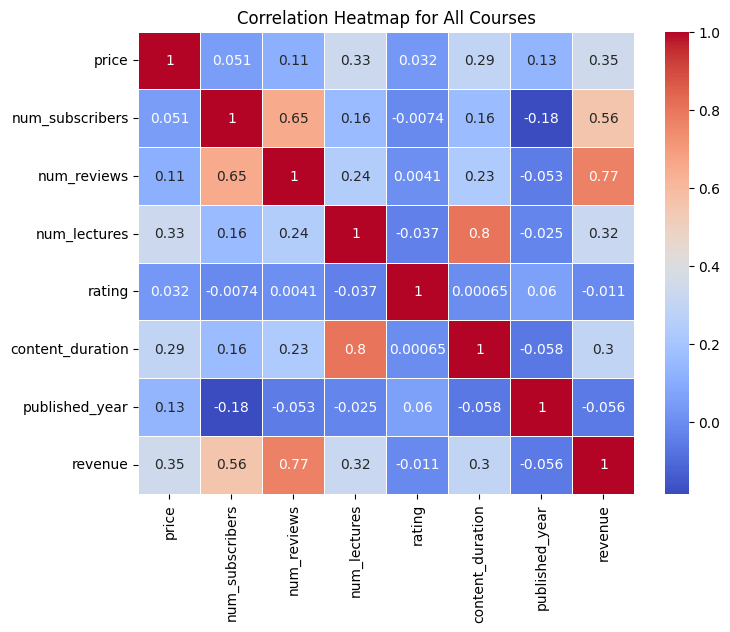

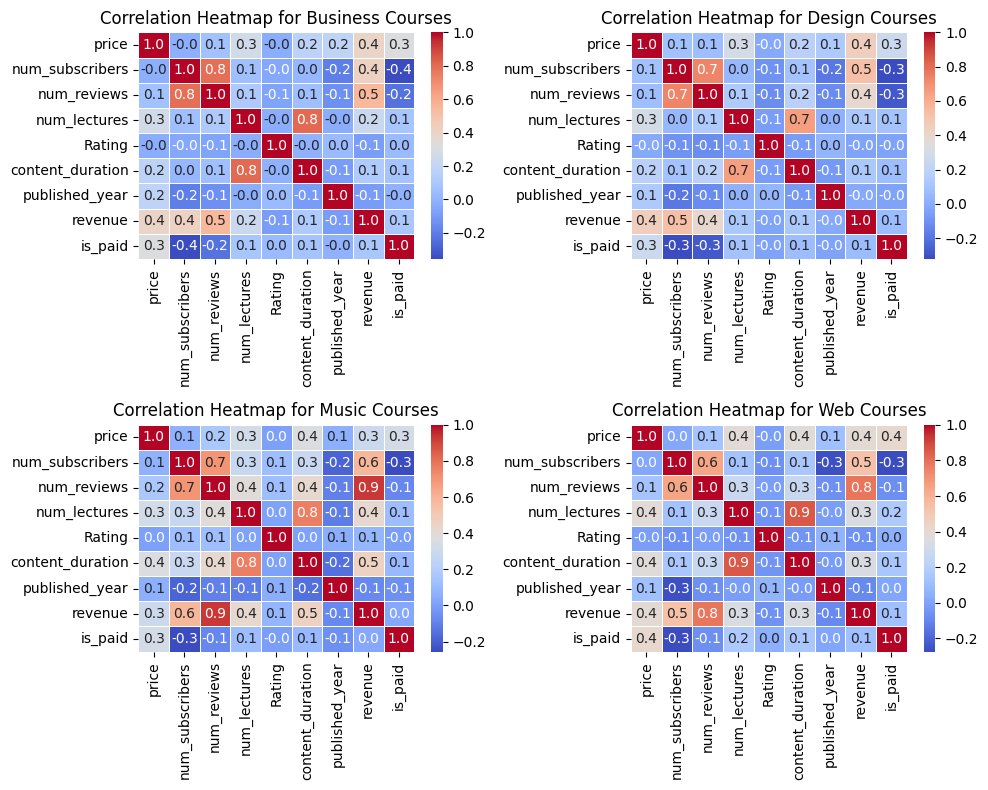

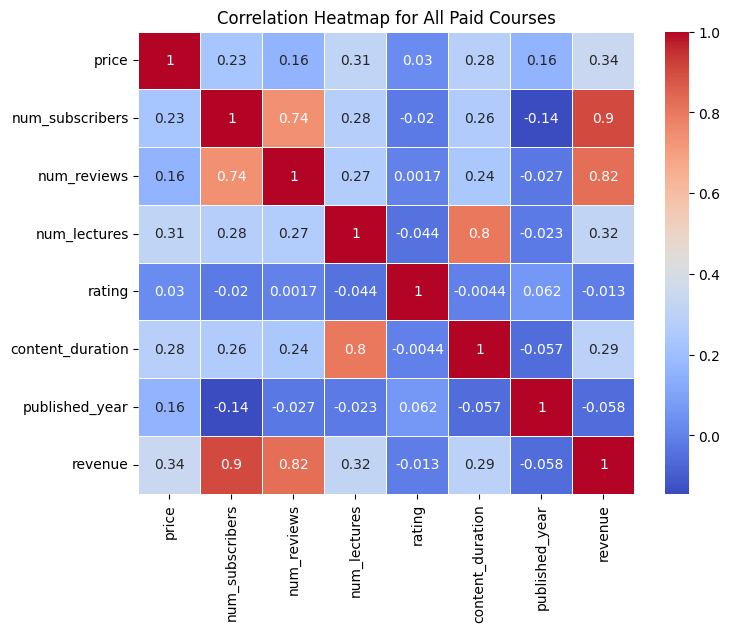

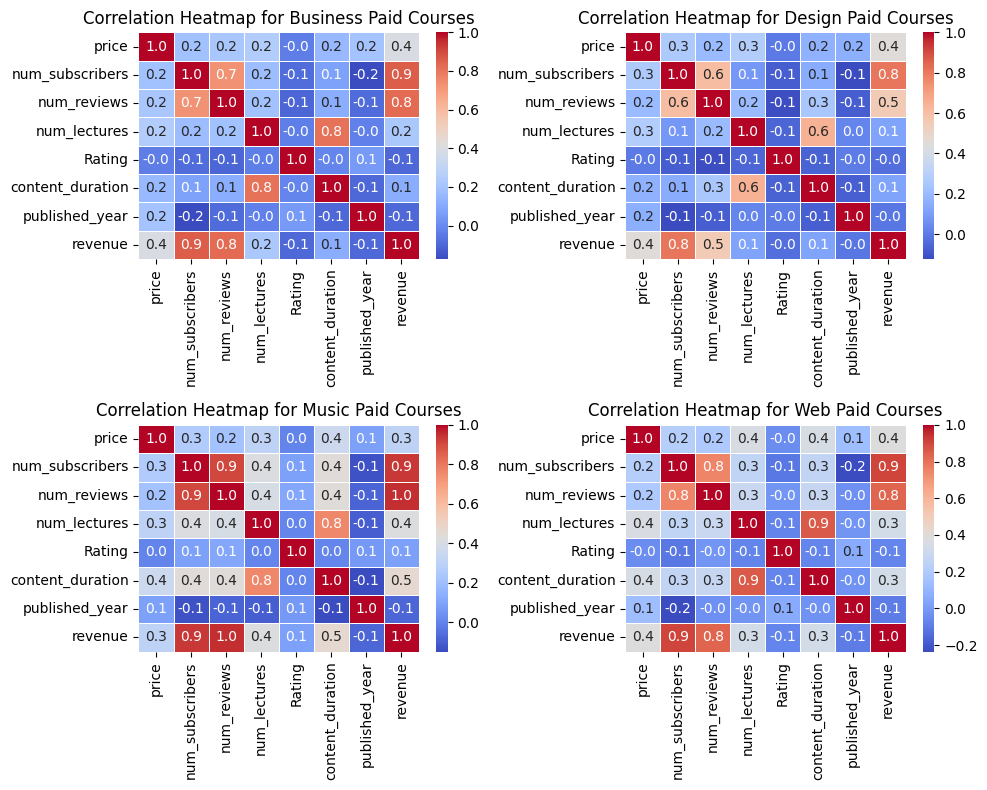

In [263]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to filter numeric columns and calculate correlation matrix
def corr_matrix_for(data, name):
    # Filtering out non-numeric columns
    data_numeric = data.select_dtypes(include='number')

    # Plotting the heatmap
    plt.figure(figsize=(8, 6))

    correlation_matrix = data_numeric.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

    plt.title(f'Correlation Heatmap for {name}')
    plt.show()

def plot_for_matrices(business, design, music, web, name_b, name_d, name_m, name_w):
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))

    # Filtering out non-numeric columns for each dataset
    business_numeric = business.select_dtypes(include='number')
    design_numeric = design.select_dtypes(include='number')
    music_numeric = music.select_dtypes(include='number')
    web_numeric = web.select_dtypes(include='number')

    # Business Matrix
    corr_matrix = business_numeric.corr()
    annot = corr_matrix.map(lambda x: '{:.1f}'.format(x))
    sns.heatmap(corr_matrix, annot=annot, cmap='coolwarm', linewidths=0.5, ax=axes[0, 0], fmt="")
    axes[0, 0].set_title(f'Correlation Heatmap for {name_b}')

    # Design Matrix
    corr_matrix = design_numeric.corr()
    annot = corr_matrix.map(lambda x: '{:.1f}'.format(x))
    sns.heatmap(corr_matrix, annot=annot, cmap='coolwarm', linewidths=0.5, ax=axes[0, 1], fmt="")
    axes[0, 1].set_title(f'Correlation Heatmap for {name_d}')

    # Music Matrix
    corr_matrix = music_numeric.corr()
    annot = corr_matrix.map(lambda x: '{:.1f}'.format(x))
    sns.heatmap(corr_matrix, annot=annot, cmap='coolwarm', linewidths=0.5, ax=axes[1, 0], fmt="")
    axes[1, 0].set_title(f'Correlation Heatmap for {name_m}')

    # Web Matrix
    corr_matrix = web_numeric.corr()
    annot = corr_matrix.map(lambda x: '{:.1f}'.format(x))
    sns.heatmap(corr_matrix, annot=annot, cmap='coolwarm', linewidths=0.5, ax=axes[1, 1], fmt="")
    axes[1, 1].set_title(f'Correlation Heatmap for {name_w}')

    plt.tight_layout()
    plt.show()

corr_matrix_for(all_courses, "All Courses")
plot_for_matrices(business, design, music, web, "Business Courses", "Design Courses", "Music Courses", "Web Courses")

corr_matrix_for(all_courses_p, "All Paid Courses")
plot_for_matrices(business_p, design_p, music_p, web_p, "Business Paid Courses", "Design Paid Courses", "Music Paid Courses", "Web Paid Courses")


In [264]:

def correlation_lin_regr_for(x, y, name_x, name_y):
    print(f"Max {name_x}: {max(x)}")
    print(f"Min {name_x}: {min(x)}")
    print(f"Max {name_y}: {max(y)}")
    print(f"Min {name_y}: {min(y)}")

    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    predicted_y = slope * x + intercept

    # Calculate R-squared value
    r_squared = r_value ** 2

    # Calculate correlation
    correlation = x.corr(y)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y, predicted_y)

    # Plot the scatter plot
    sns.scatterplot(x=x, y=y, data=all_courses)
    plt.title(f'Correlation between {name_x} and {name_y}\n\nR-squared: {r_squared:.2f}, MSE: {mse:.2f}, Correlation Coefficient: {correlation:.2f}')
    plt.xlabel(f'{name_x}')
    plt.ylabel(f'{name_y}')

    # Plot the regression line
    plt.plot(x, slope * x + intercept, color='red', label='Approximate Line')

    plt.grid(True)
    plt.legend()
    plt.show()

def plot_lin_regrs_for(data, name):
    print(f"{name}\n")
    correlation_lin_regr_for(data['num_subscribers'], data['num_reviews'], "Subscribers", "Reviews")
    correlation_lin_regr_for(data['num_subscribers'], data['price'], "Subscribers", "Price")
    correlation_lin_regr_for(data['num_subscribers'], data['revenue'], "Subscribers", "Revenue")
    correlation_lin_regr_for(data['content_duration'], data['num_lectures'], "Duration", "Lectures")


All Courses

Max Subscribers: 268923
Min Subscribers: 0
Max Reviews: 27445
Min Reviews: 0


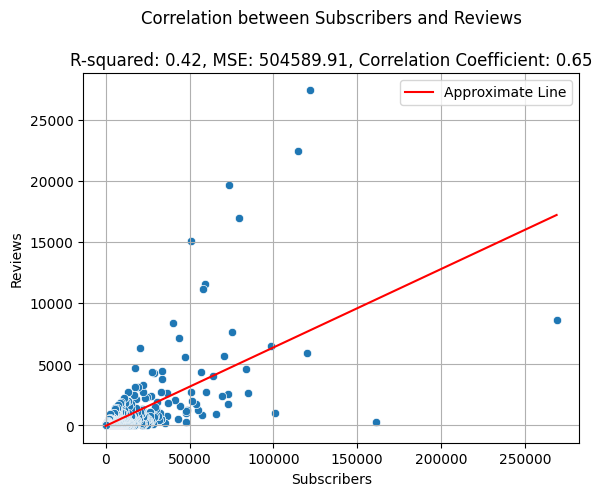

Max Subscribers: 268923
Min Subscribers: 0
Max Price: 200
Min Price: 0


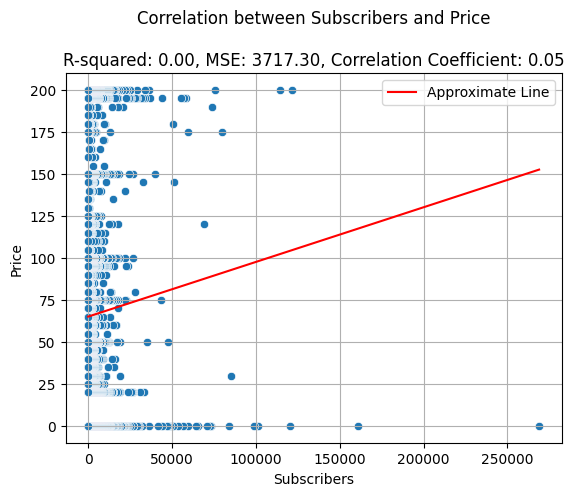

Max Subscribers: 268923
Min Subscribers: 0
Max Revenue: 24316800
Min Revenue: 0


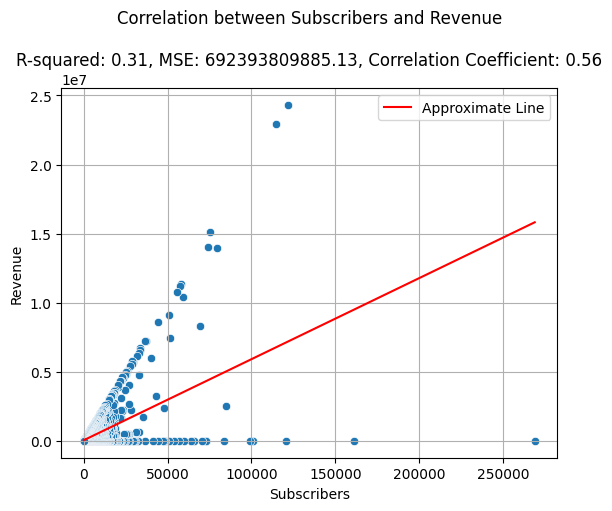

Max Duration: 78.5
Min Duration: 0.0
Max Lectures: 779
Min Lectures: 0


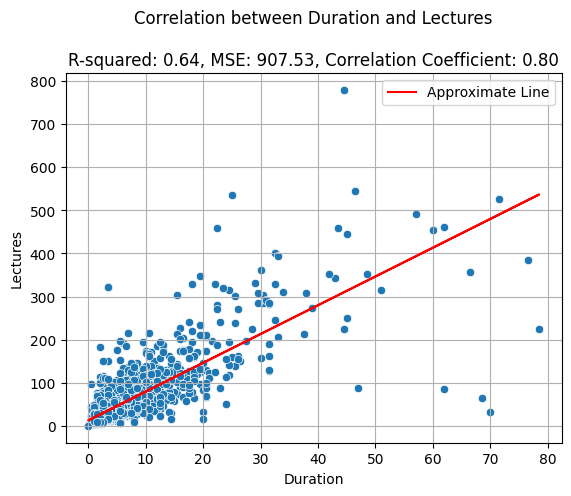

Business Courses

Max Subscribers: 65576.0
Min Subscribers: 0.0
Max Reviews: 4397.0
Min Reviews: 0.0


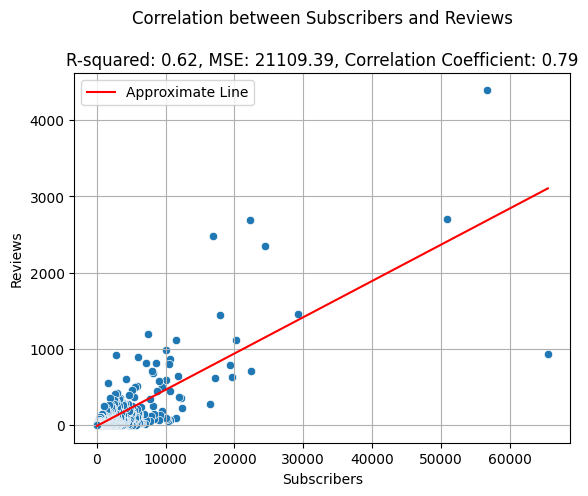

Max Subscribers: 65576.0
Min Subscribers: 0.0
Max Price: 200.0
Min Price: 0.0


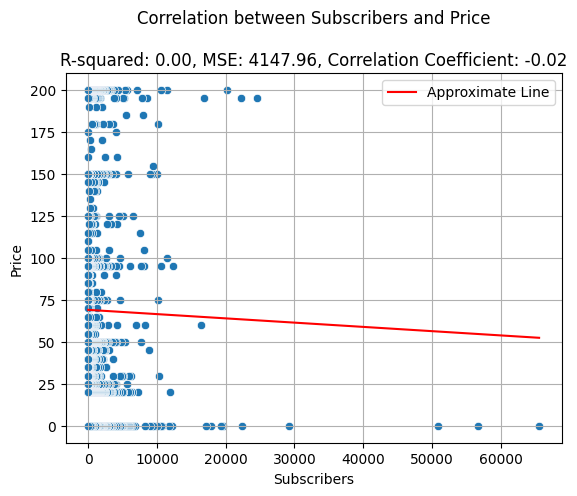

Max Subscribers: 65576.0
Min Subscribers: 0.0
Max Revenue: 4773795.0
Min Revenue: 0.0


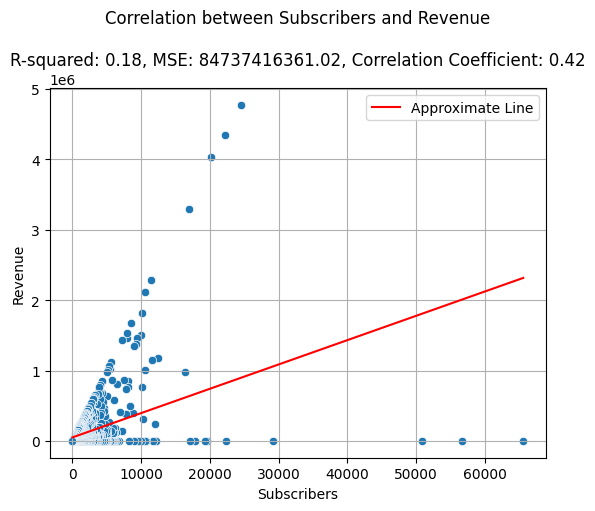

Max Duration: 71.5
Min Duration: 0.0
Max Lectures: 544.0
Min Lectures: 0.0


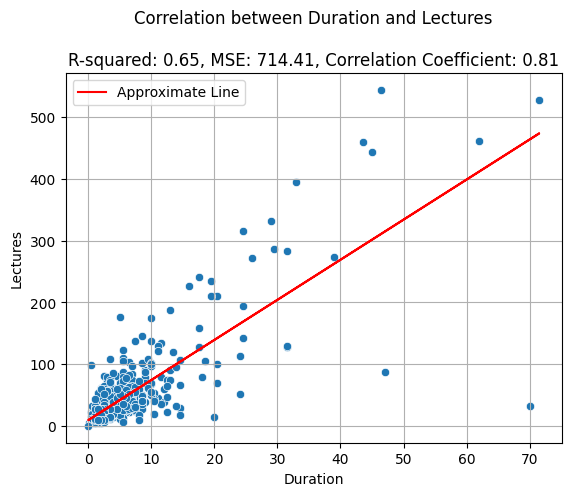

Design Courses

Max Subscribers: 53851.0
Min Subscribers: 0.0
Max Reviews: 2379.0
Min Reviews: 0.0


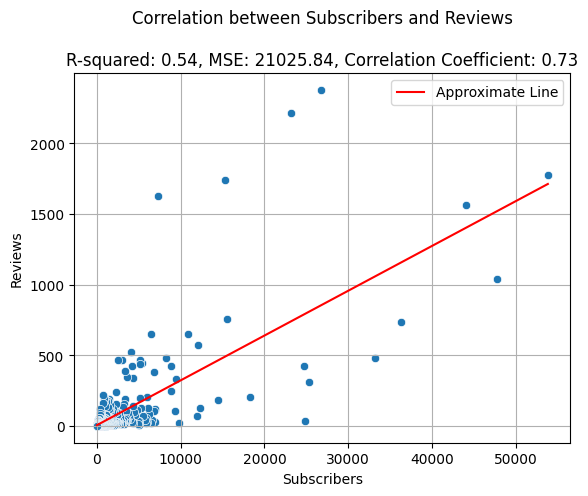

Max Subscribers: 53851.0
Min Subscribers: 0.0
Max Price: 200.0
Min Price: 0.0


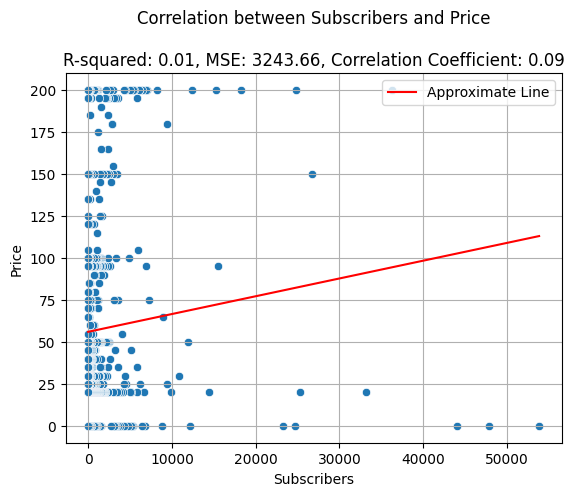

Max Subscribers: 53851.0
Min Subscribers: 0.0
Max Revenue: 7257600.0
Min Revenue: 0.0


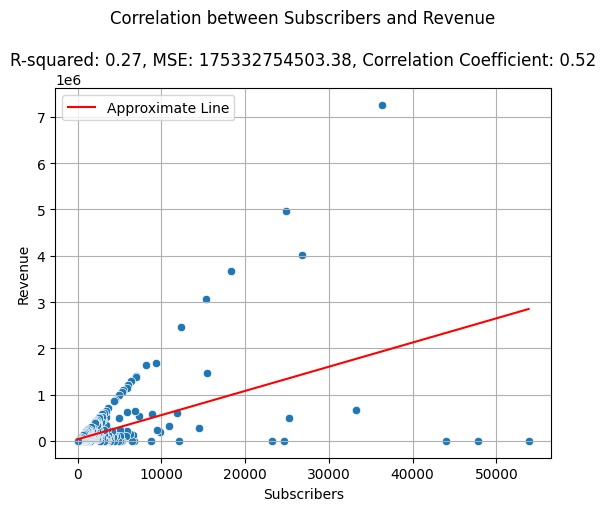

Max Duration: 78.5
Min Duration: 0.5
Max Lectures: 225.0
Min Lectures: 5.0


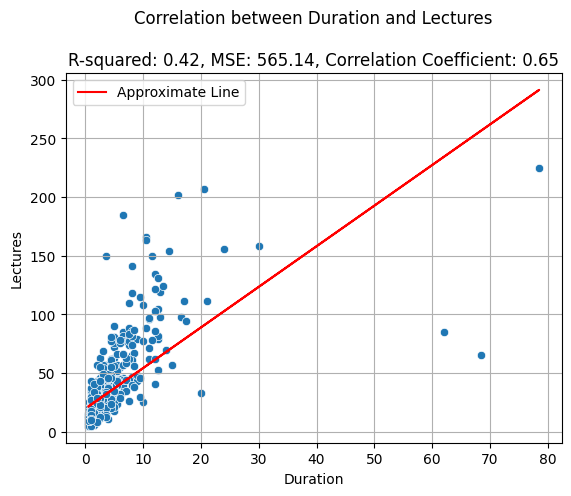

Music Courses

Max Subscribers: 101154.0
Min Subscribers: 0.0
Max Reviews: 7676.0
Min Reviews: 0.0


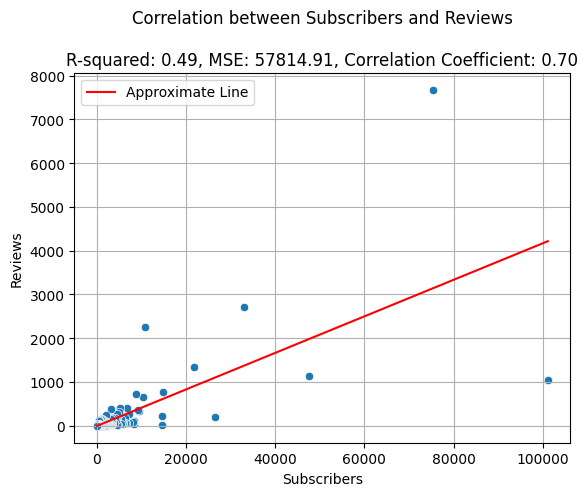

Max Subscribers: 101154.0
Min Subscribers: 0.0
Max Price: 200.0
Min Price: 0.0


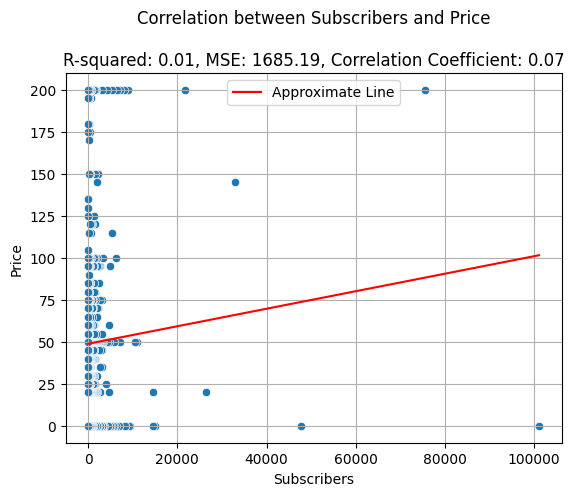

Max Subscribers: 101154.0
Min Subscribers: 0.0
Max Revenue: 15099800.0
Min Revenue: 0.0


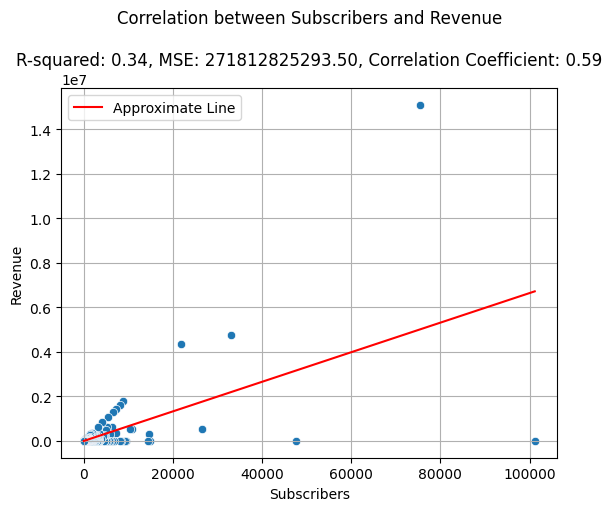

Max Duration: 38.0
Min Duration: 0.4833333333
Max Lectures: 362.0
Min Lectures: 4.0


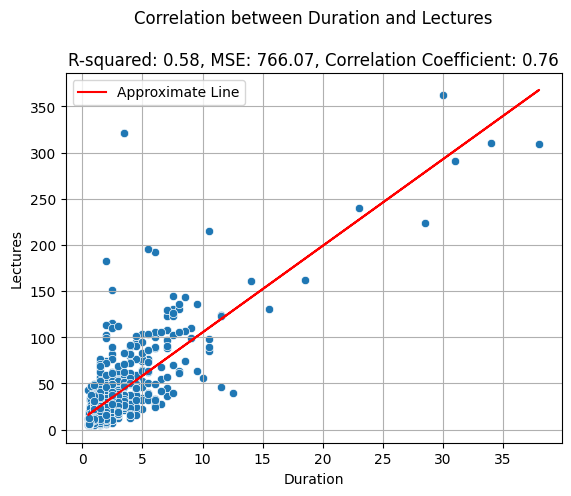

Web Courses

Max Subscribers: 268923.0
Min Subscribers: 19.0
Max Reviews: 27445.0
Min Reviews: 0.0


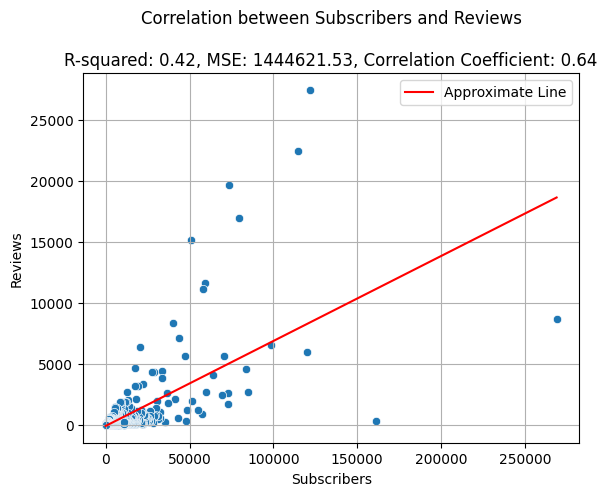

Max Subscribers: 268923.0
Min Subscribers: 19.0
Max Price: 200.0
Min Price: 0.0


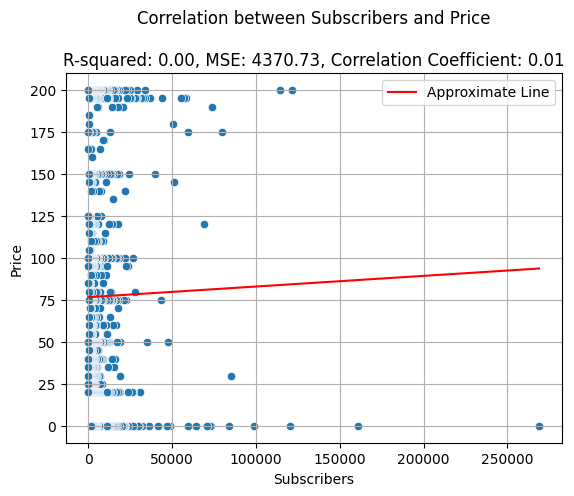

Max Subscribers: 268923.0
Min Subscribers: 19.0
Max Revenue: 24316800.0
Min Revenue: 0.0


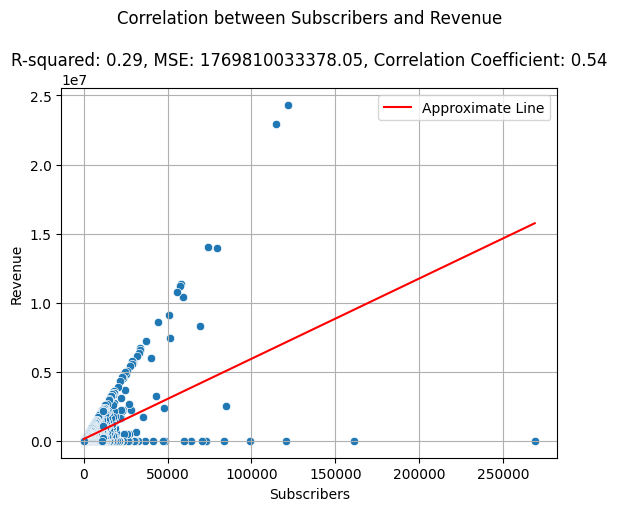

Max Duration: 76.5
Min Duration: 0.5
Max Lectures: 779.0
Min Lectures: 5.0


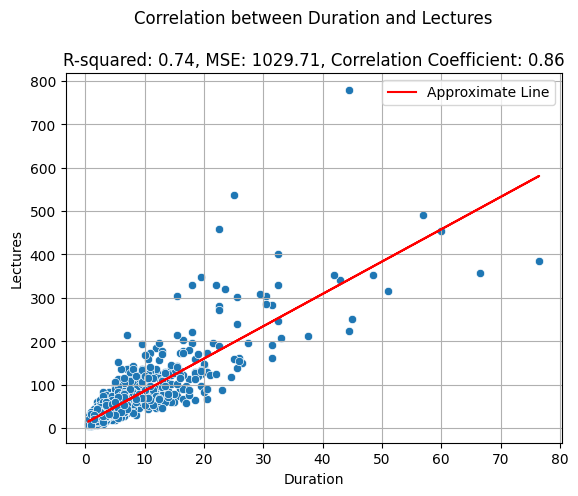

All Courses

Max Subscribers: 121584
Min Subscribers: 0
Max Reviews: 27445
Min Reviews: 0


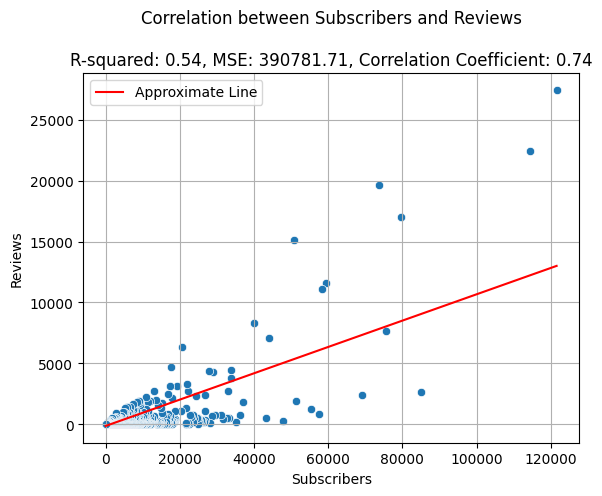

Max Subscribers: 121584
Min Subscribers: 0
Max Price: 200
Min Price: 20


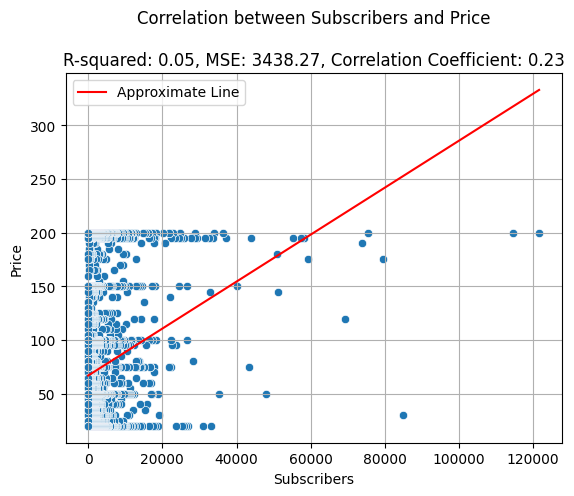

Max Subscribers: 121584
Min Subscribers: 0
Max Revenue: 24316800
Min Revenue: 0


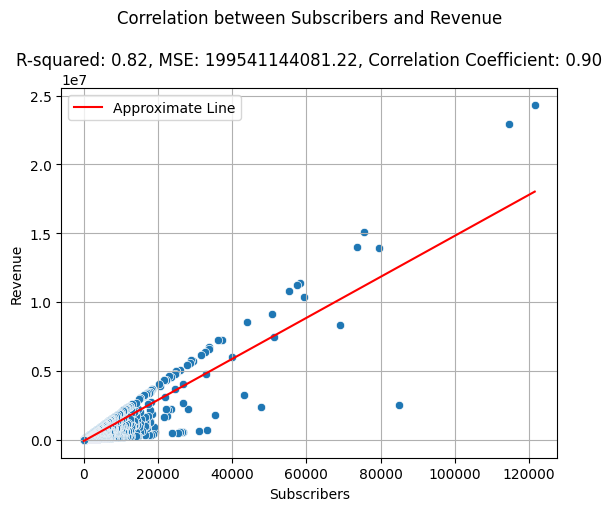

Max Duration: 78.5
Min Duration: 0.0
Max Lectures: 779
Min Lectures: 0


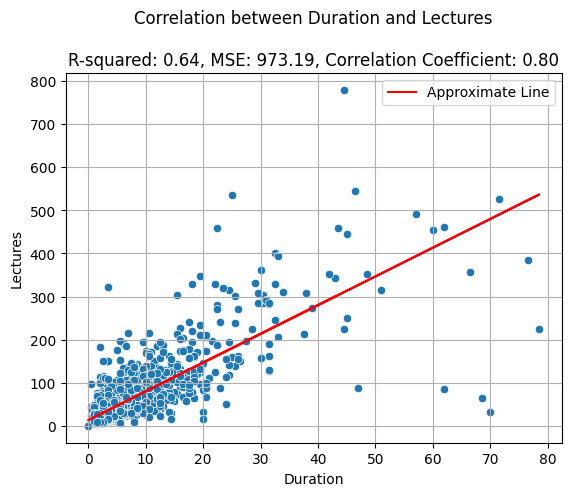

Business Courses

Max Subscribers: 24481.0
Min Subscribers: 0.0
Max Reviews: 2697.0
Min Reviews: 0.0


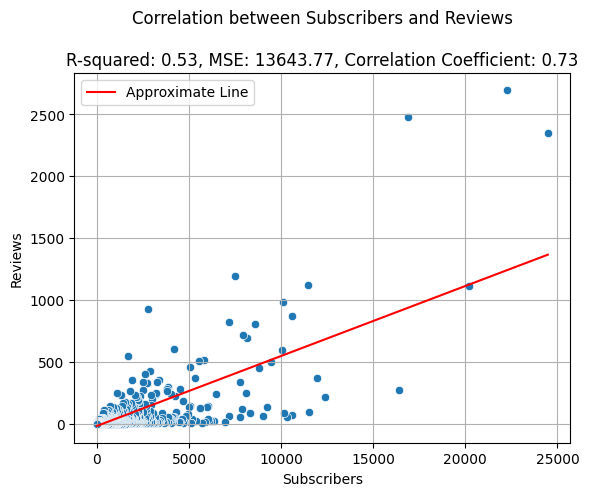

Max Subscribers: 24481.0
Min Subscribers: 0.0
Max Price: 200.0
Min Price: 20.0


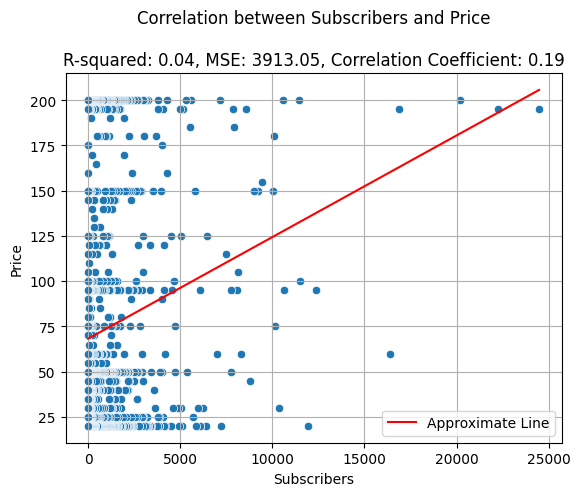

Max Subscribers: 24481.0
Min Subscribers: 0.0
Max Revenue: 4773795.0
Min Revenue: 0.0


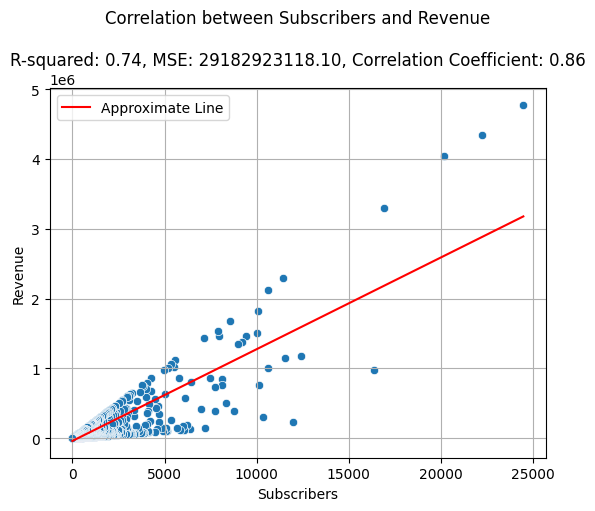

Max Duration: 71.5
Min Duration: 0.0
Max Lectures: 544.0
Min Lectures: 0.0


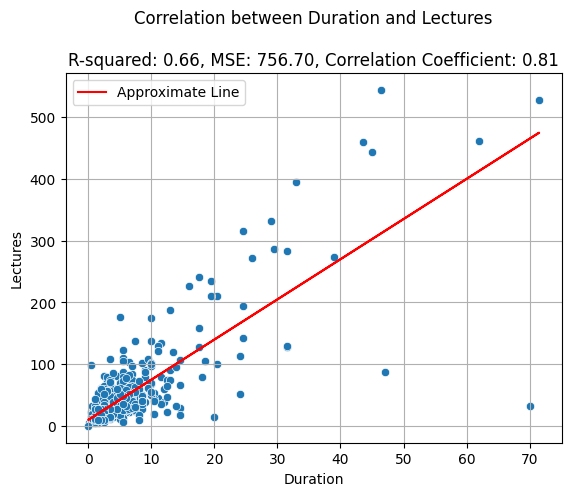

Design Courses

Max Subscribers: 36288.0
Min Subscribers: 0.0
Max Reviews: 2379.0
Min Reviews: 0.0


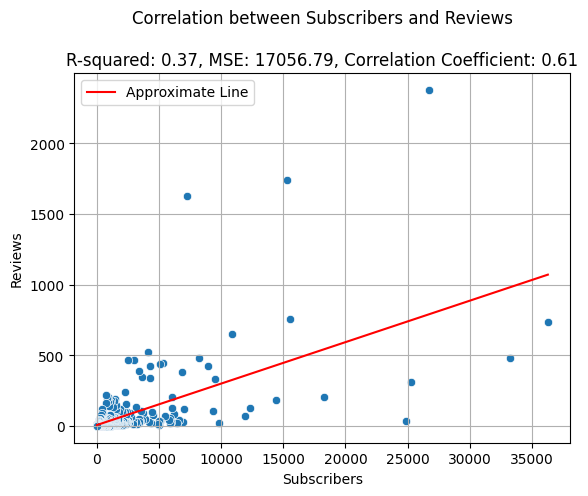

Max Subscribers: 36288.0
Min Subscribers: 0.0
Max Price: 200.0
Min Price: 20.0


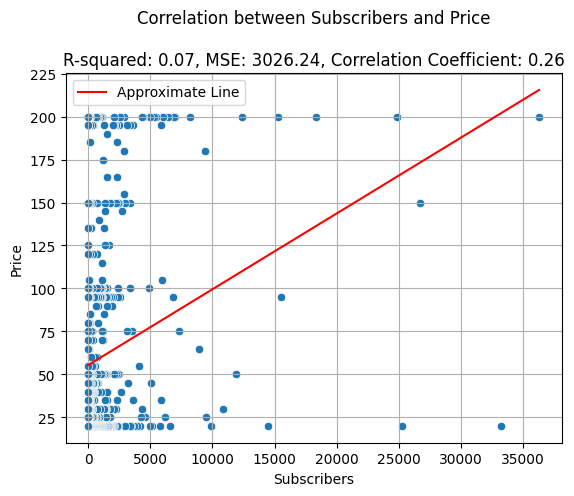

Max Subscribers: 36288.0
Min Subscribers: 0.0
Max Revenue: 7257600.0
Min Revenue: 0.0


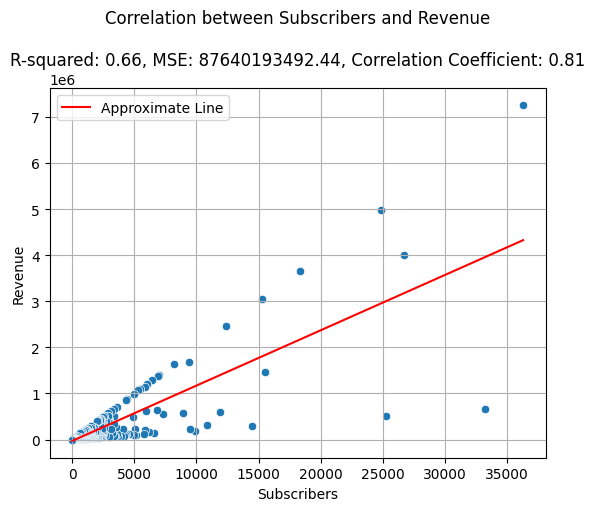

Max Duration: 78.5
Min Duration: 0.5
Max Lectures: 225.0
Min Lectures: 5.0


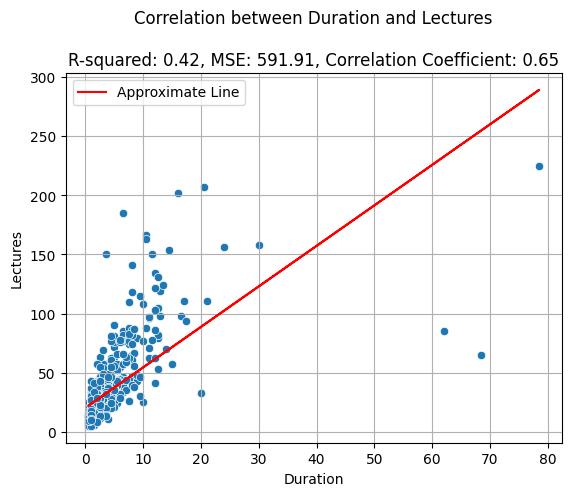

Music Courses

Max Subscribers: 75499.0
Min Subscribers: 0.0
Max Reviews: 7676.0
Min Reviews: 0.0


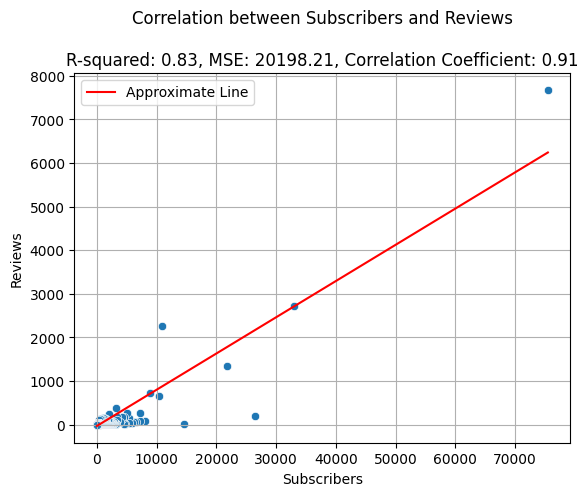

Max Subscribers: 75499.0
Min Subscribers: 0.0
Max Price: 200.0
Min Price: 20.0


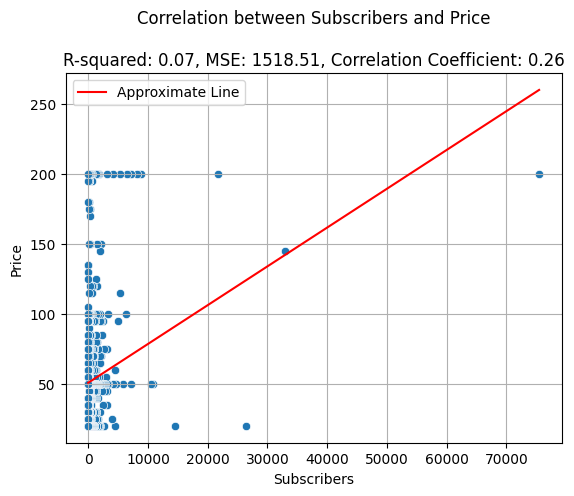

Max Subscribers: 75499.0
Min Subscribers: 0.0
Max Revenue: 15099800.0
Min Revenue: 0.0


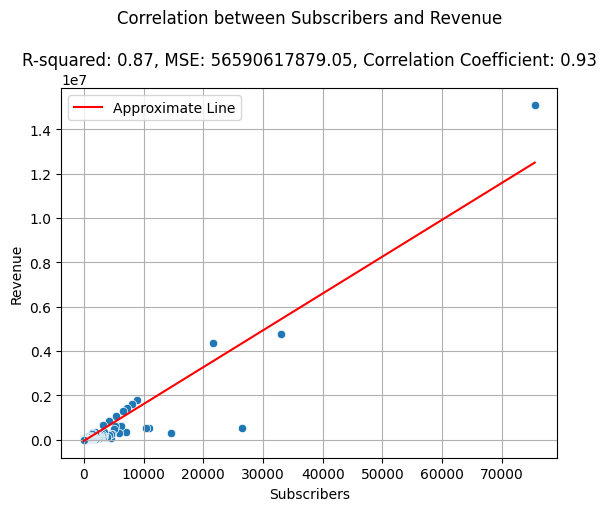

Max Duration: 38.0
Min Duration: 0.4833333333
Max Lectures: 362.0
Min Lectures: 4.0


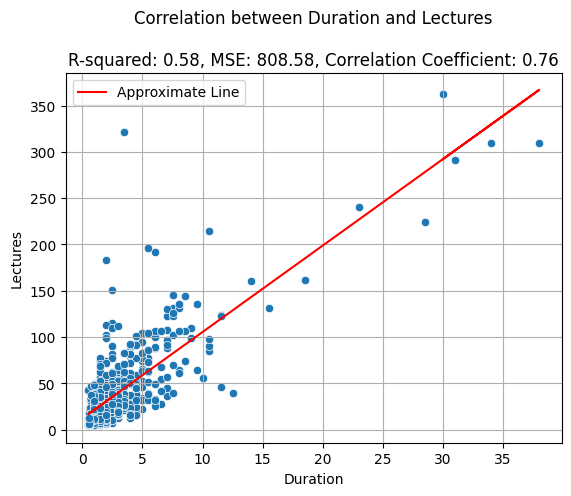

Web Courses

Max Subscribers: 121584.0
Min Subscribers: 19.0
Max Reviews: 27445.0
Min Reviews: 0.0


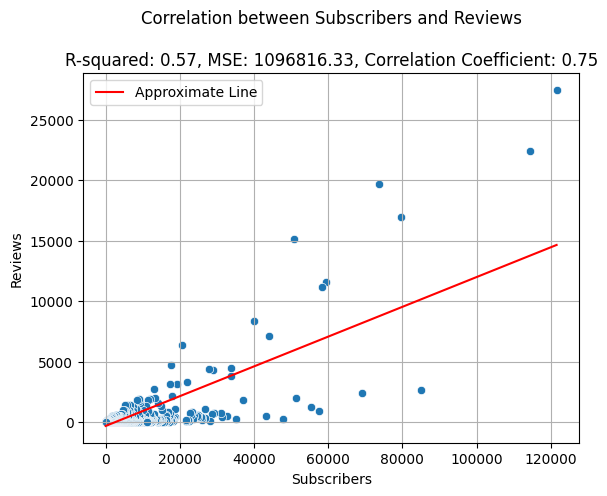

Max Subscribers: 121584.0
Min Subscribers: 19.0
Max Price: 200.0
Min Price: 20.0


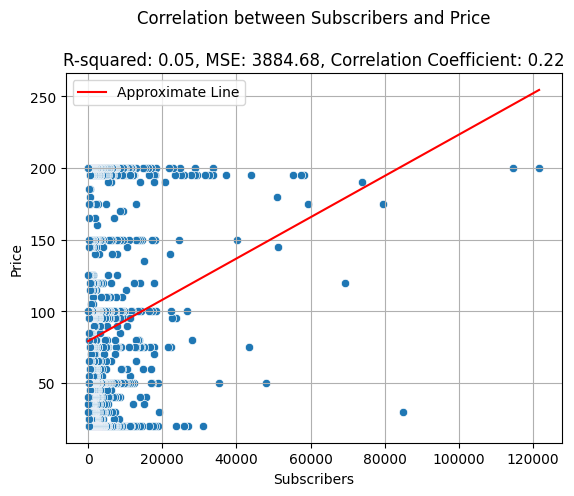

Max Subscribers: 121584.0
Min Subscribers: 19.0
Max Revenue: 24316800.0
Min Revenue: 1650.0


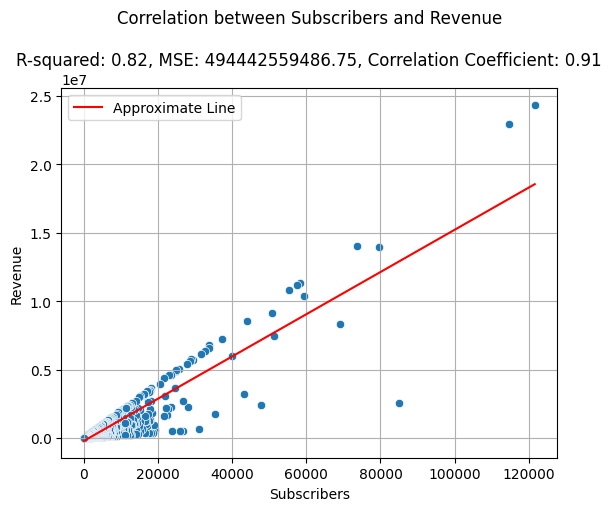

Max Duration: 76.5
Min Duration: 0.5
Max Lectures: 779.0
Min Lectures: 6.0


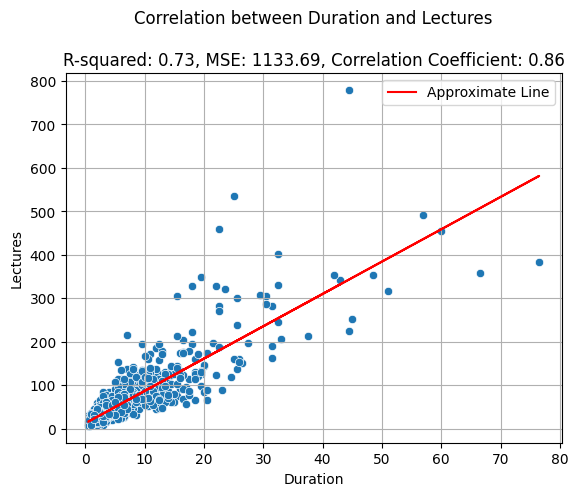

In [265]:
plot_lin_regrs_for(all_courses, "All Courses")
plot_lin_regrs_for(business, "Business Courses")
plot_lin_regrs_for(design, "Design Courses")
plot_lin_regrs_for(music, "Music Courses")
plot_lin_regrs_for(web, "Web Courses")

plot_lin_regrs_for(all_courses_p, "All Courses")
plot_lin_regrs_for(business_p, "Business Courses")
plot_lin_regrs_for(design_p, "Design Courses")
plot_lin_regrs_for(music_p, "Music Courses")
plot_lin_regrs_for(web_p, "Web Courses")

In [266]:
all_courses.head()

course_title  price  num_subscribers  \
0               Learn HTML5 Programming From Scratch      0           268923   
1                     Coding for Entrepreneurs Basic      0           161029   
2                         The Web Developer Bootcamp    200           121584   
3  Build Your First Website in 1 Week with HTML5 ...      0           120291   
4              The Complete Web Developer Course 2.0    200           114512   

   num_reviews  num_lectures           level  rating  content_duration  \
0         8629            45  Beginner Level    0.82              10.5   
1          279            27    Expert Level    0.69               3.5   
2        27445           342  Beginner Level    0.89              43.0   
3         5924            30      All Levels    0.78               3.0   
4        22412           304  Beginner Level    0.55              30.5   

        published_timestamp          subject        Date Free/Paid  \
0 2013-02-14 07:03:41+00:00  Web Development  2013-02-14      Free   
1 2013-06-09 15:51:55+00:00  Web Development  2013-06-09      Free   
2 2015-11-02 21:13:27+00:00  Web Development  2015-11-02      Paid   
3 2014-04-08 16:21:30+00:00  Web Development  2014-04-08      Free   
4 2016-03-08 22:28:36+00:00  Web Development  2016-03-08      Paid   

   published_year   revenue  
0            2013         0  
1            2013         0  
2            2015  24316800  
3            2014         0  
4            2016  22902400

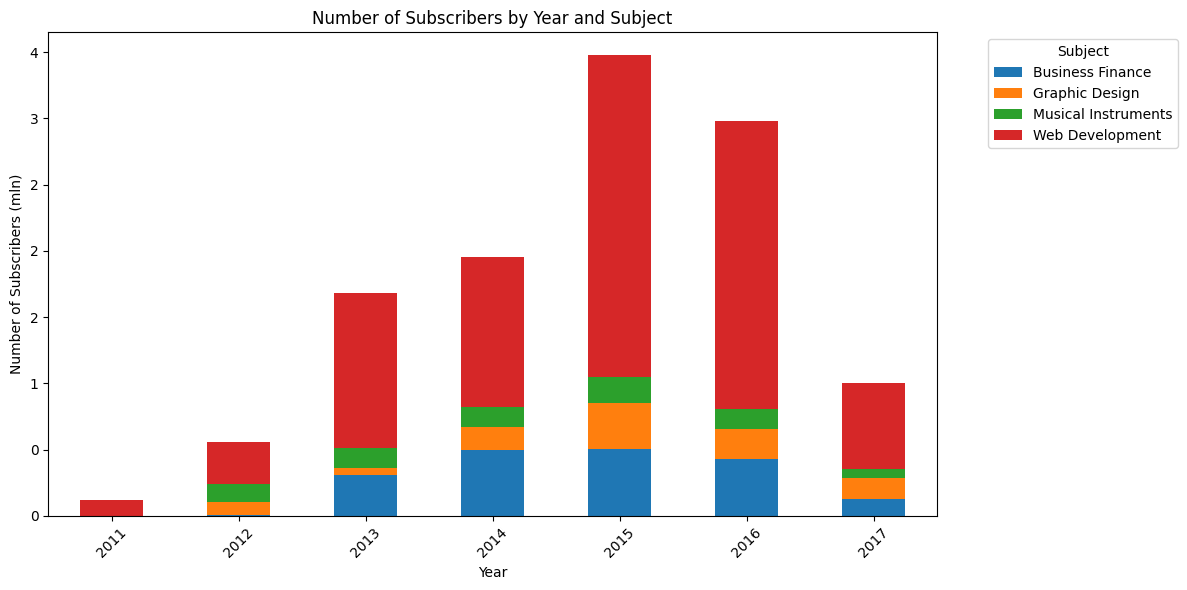

In [267]:
# Grouping by the year and subject, then counting the sum of subscribers

grouped_data = all_courses.groupby(['published_year', 'subject'])['num_subscribers'].sum().unstack(fill_value=0)

ax = grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Number of Subscribers by Year and Subject')
plt.xlabel('Year')
plt.ylabel('Number of Subscribers (mln)')
plt.xticks(rotation=45)
plt.legend(title='Subject', bbox_to_anchor=(1.05, 1), loc='upper left')

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x/1000000)))

plt.tight_layout()
plt.show()

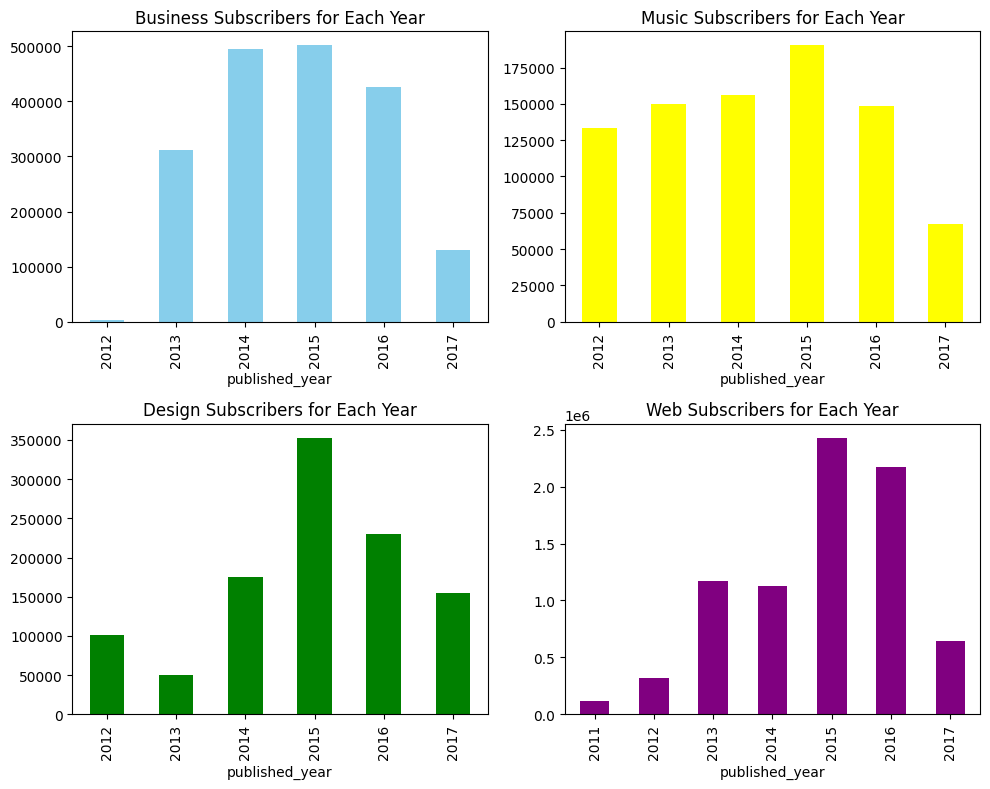

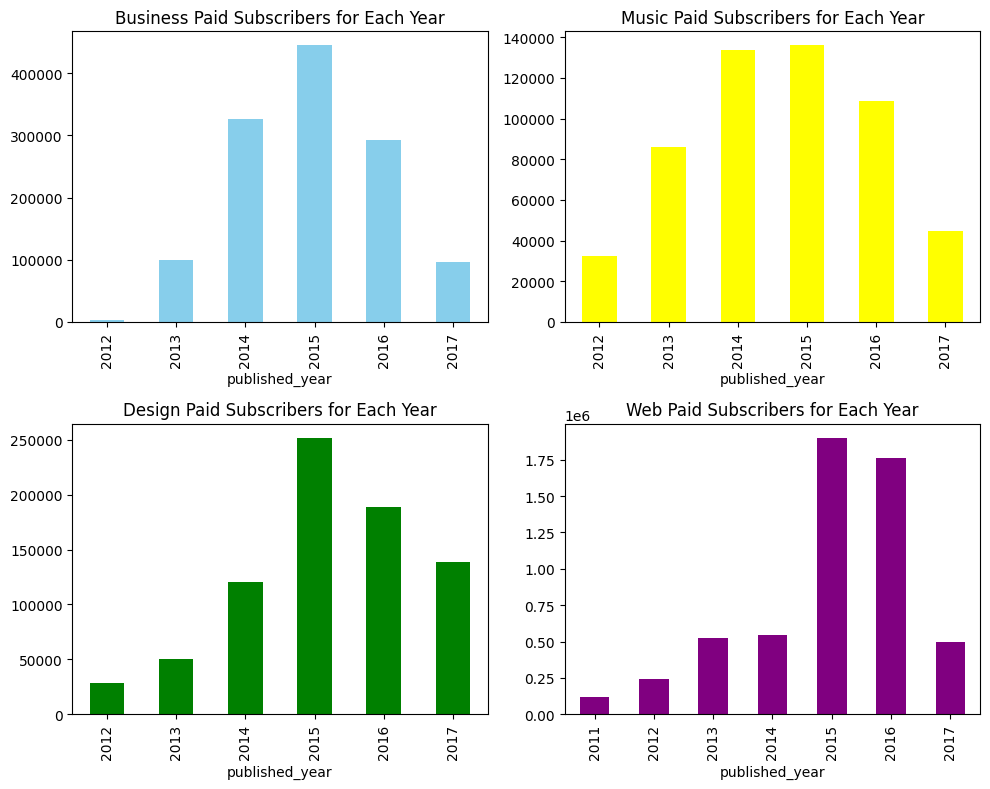

In [268]:
def year_subscribers_for(business, design, music, web, name_b, name_d, name_m, name_w):
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))

    subscribers_by_year = business.groupby('published_year')['num_subscribers'].sum()
    subscribers_by_year.plot(kind='bar', color='skyblue', ax = axes[0, 0])
    axes[0, 0].set_title(f'{name_b} Subscribers for Each Year')

    subscribers_by_year = design.groupby('published_year')['num_subscribers'].sum()
    subscribers_by_year.plot(kind='bar', color='green', ax = axes[1, 0])
    axes[1, 0].set_title(f'{name_d} Subscribers for Each Year')

    subscribers_by_year = music.groupby('published_year')['num_subscribers'].sum()
    subscribers_by_year.plot(kind='bar', color='yellow', ax = axes[0, 1])
    axes[0, 1].set_title(f'{name_m} Subscribers for Each Year')

    subscribers_by_year = web.groupby('published_year')['num_subscribers'].sum()
    subscribers_by_year.plot(kind='bar', color='purple', ax = axes[1, 1])
    axes[1, 1].set_title(f'{name_w} Subscribers for Each Year')

    plt.tight_layout()

    plt.show()

year_subscribers_for(business, design, music, web, "Business", "Design", "Music", "Web")
year_subscribers_for(business_p, design_p, music_p, web_p, "Business Paid", "Design Paid", "Music Paid", "Web Paid")

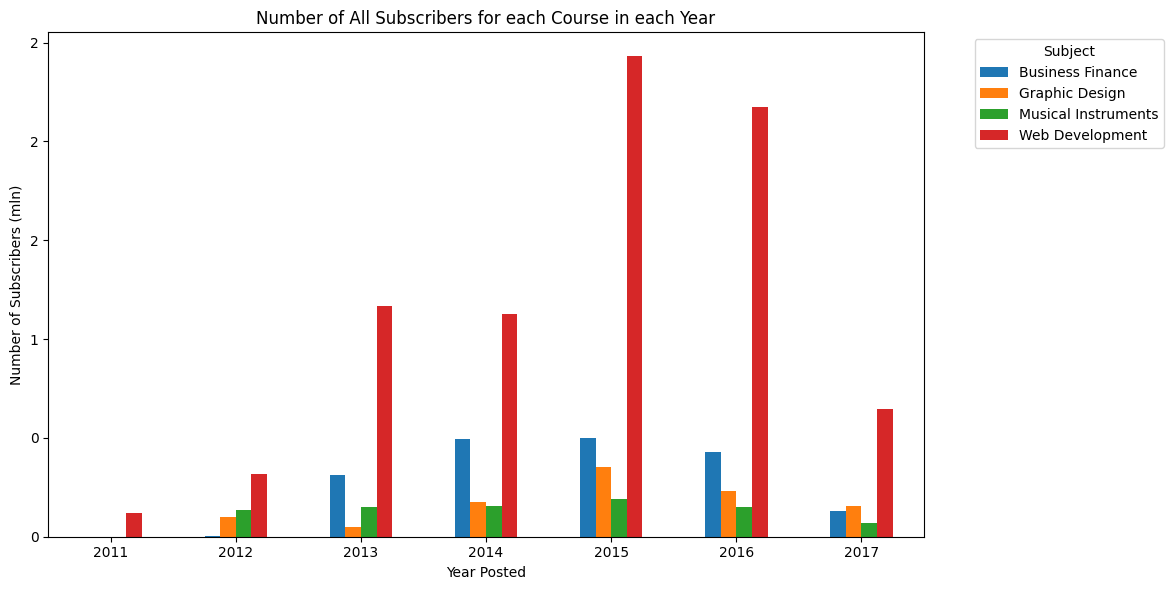

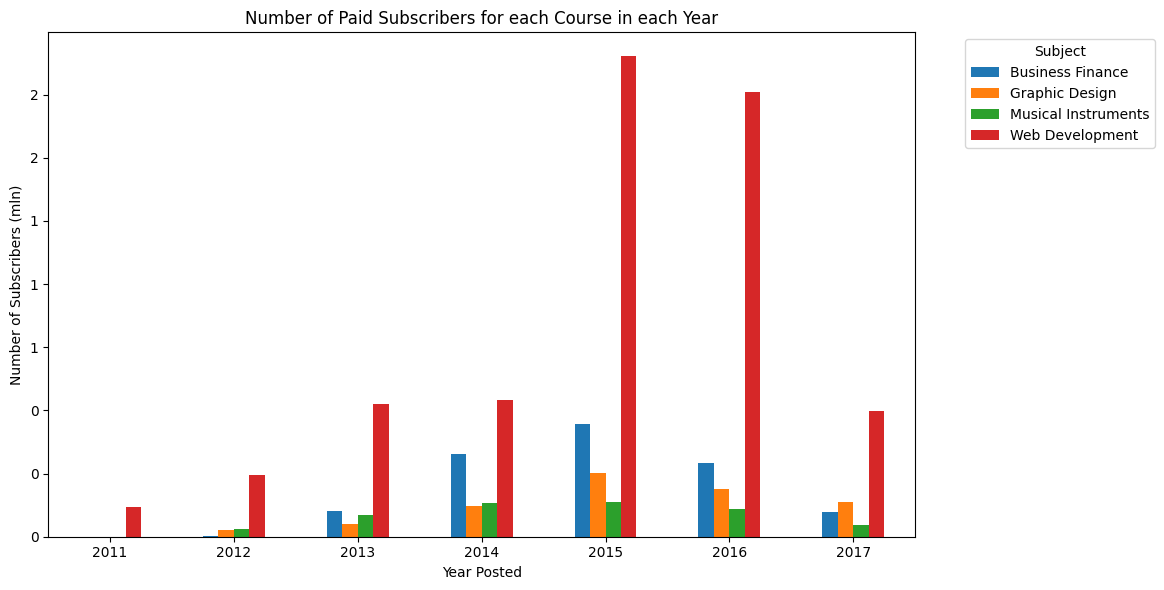

price  num_subscribers   num_reviews  num_lectures       Rating  \
count  1203.000000      1203.000000   1203.000000   1203.000000  1203.000000   
mean     77.036575      6635.024938    357.355777     52.767249     0.643051   
std      66.145420     14559.419007   1572.917685     62.762267     0.306004   
min       0.000000        19.000000      0.000000      5.000000     0.000000   
25%      20.000000      1128.500000     25.000000     19.000000     0.340000   
50%      50.000000      2430.000000     65.000000     32.000000     0.760000   
75%     115.000000      6947.500000    179.000000     63.500000     0.920000   
max     200.000000    268923.000000  27445.000000    779.000000     1.000000   

       content_duration  published_year       revenue      is_paid  
count       1203.000000     1203.000000  1.203000e+03  1203.000000  
mean           5.586658     2015.494597  5.245906e+05     0.888612  
std            7.242855        1.166902  1.576703e+06     0.314743  
min            0.500000     2011.000000  0.000000e+00     0.000000  
25%            1.500000     2015.000000  2.928000e+04     1.000000  
50%            3.000000     2016.000000  9.696000e+04     1.000000  
75%            6.500000     2016.000000  3.632700e+05     1.000000  
max           76.500000     2017.000000  2.431680e+07     1.000000

price  num_subscribers   num_reviews  num_lectures       Rating  \
count  1069.000000      1069.000000   1069.000000   1069.000000  1069.000000   
mean     86.693171      5227.472404    317.275959     56.379794     0.647989   
std      63.923566      9759.157317   1593.601222     65.304357     0.305673   
min      20.000000        19.000000      0.000000      6.000000     0.000000   
25%      35.000000      1032.000000     22.000000     21.000000     0.350000   
50%      60.000000      2052.000000     56.000000     36.000000     0.760000   
75%     125.000000      5387.000000    147.000000     67.000000     0.920000   
max     200.000000    121584.000000  27445.000000    779.000000     1.000000   

       content_duration  published_year       revenue  
count       1069.000000     1069.000000  1.069000e+03  
mean           5.967228     2015.497661  5.903484e+05  
std            7.519982        1.156825  1.661039e+06  
min            0.500000     2011.000000  1.650000e+03  
25%            1.500000     2015.000000  4.490000e+04  
50%            3.500000     2016.000000  1.247000e+05  
75%            7.000000     2016.000000  4.590300e+05  
max           76.500000     2017.000000  2.431680e+07

In [269]:
def year_subscribers_for(data, name):
    # Grouping by the year and subject, then counting the sum of subscribers
    grouped_data = data.groupby(['published_year', 'subject'])['num_subscribers'].sum().unstack(fill_value=0)

    # Plotting a grouped bar plot
    ax = grouped_data.plot(kind='bar', figsize=(12, 6))
    plt.title(f'Number of {name} Subscribers for each Course in each Year')
    plt.xlabel('Year Posted')
    plt.ylabel('Number of Subscribers (mln)')
    plt.xticks(rotation=0)
    plt.legend(title='Subject', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x/1000000)))
    plt.show()

year_subscribers_for(all_courses, "All")
year_subscribers_for(all_courses_p, "Paid")

display(web.describe())
display(web_p.describe())

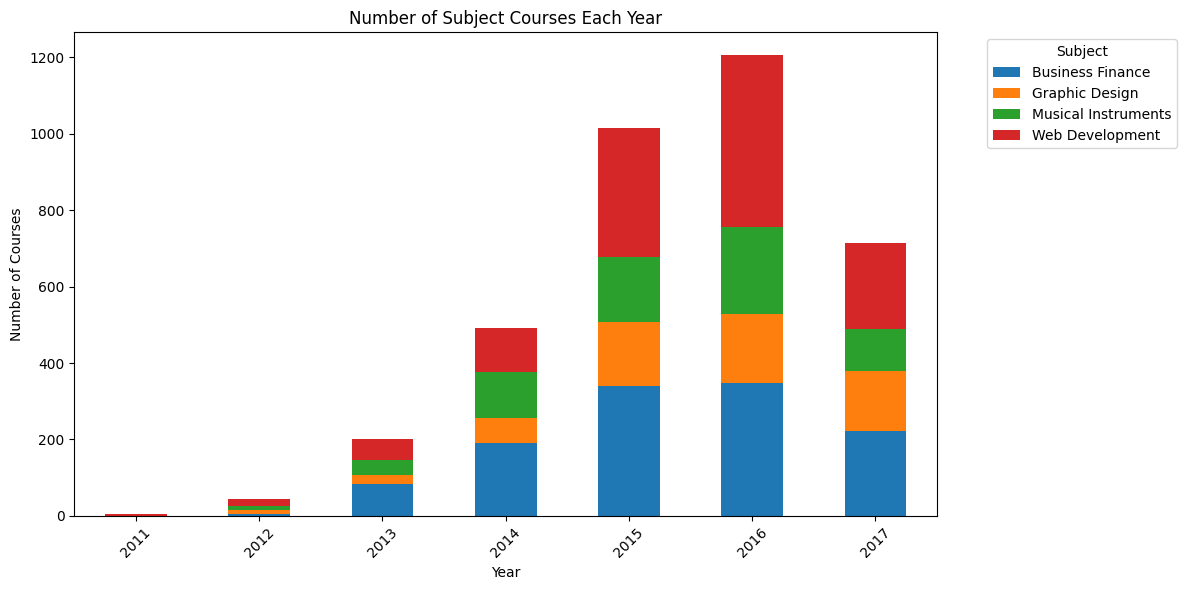

In [270]:
grouped_data = all_courses.groupby(['published_year', 'subject']).size().unstack(fill_value=0)

# Plotting the bar chart
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6))

# Adding labels and title
plt.title('Number of Subject Courses Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Courses')
plt.xticks(rotation=45)
plt.legend(title='Subject', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show plot
plt.show()

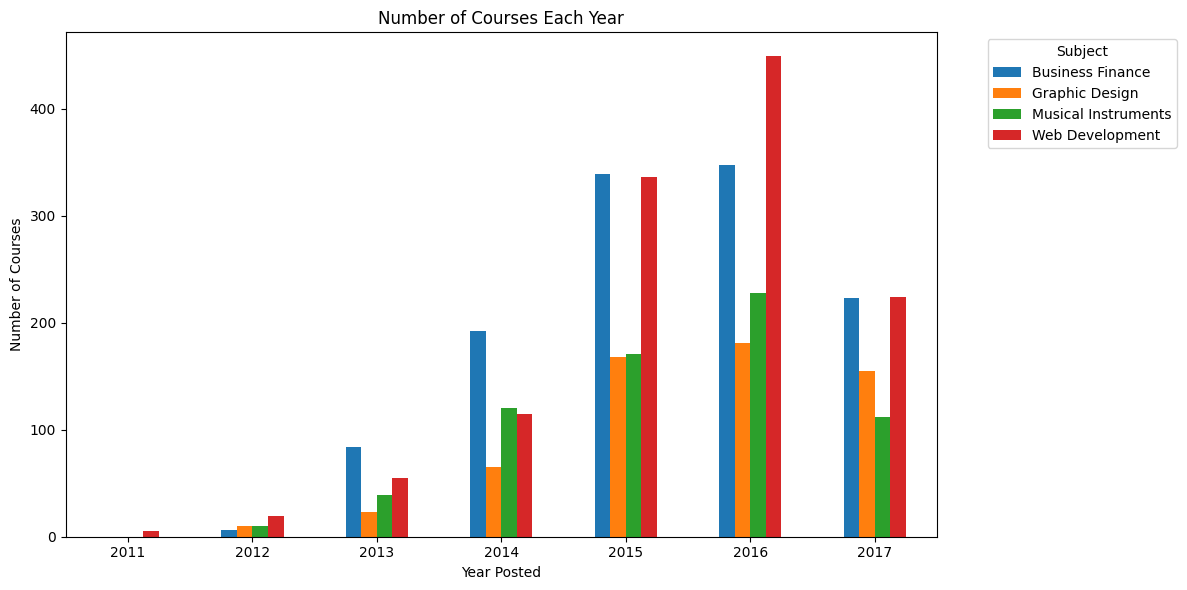

In [271]:
def year_courses_for(data):
    # Grouping by the year and subject, then counting the sum of subjects
    grouped_data = data.groupby(['published_year', 'subject']).size().unstack(fill_value=0)

    # Plotting a grouped bar plot
    ax = grouped_data.plot(kind='bar', figsize=(12, 6))
    plt.title(f'Number of Courses Each Year')
    plt.xlabel('Year Posted')
    plt.ylabel('Number of Courses')
    plt.xticks(rotation=0)
    plt.legend(title='Subject', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    # Format y-axis ticks to represent thousands
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
    plt.show()

year_courses_for(all_courses)

We can do similar analysis to see courses of what levels do people prefer. Do people usually take courses for beginner or intermidiate levels?

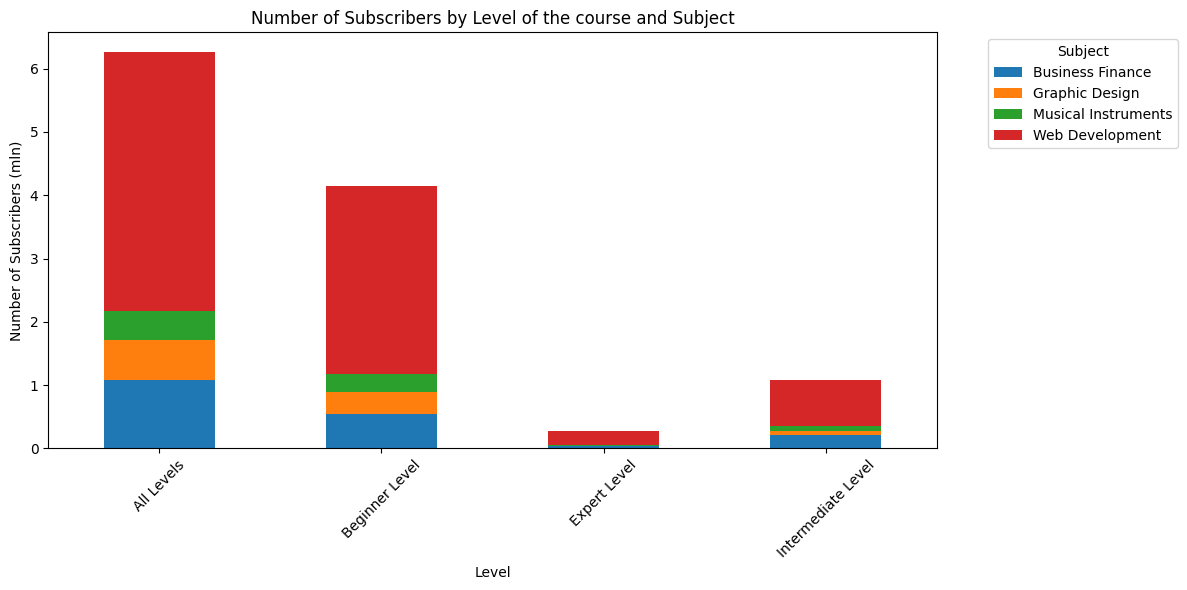

In [272]:
# Grouping by the level of course and subject, then counting the sum of subscribers

grouped_data = all_courses.groupby(['level', 'subject'])['num_subscribers'].sum().unstack(fill_value=0)

ax = grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Number of Subscribers by Level of the course and Subject')
plt.xlabel('Level')
plt.ylabel('Number of Subscribers (mln)')
plt.xticks(rotation=45)
plt.legend(title='Subject', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x/1000000)))
plt.show()

Obviously, the number of subscribers is also affected by whether or not the course is paid or free

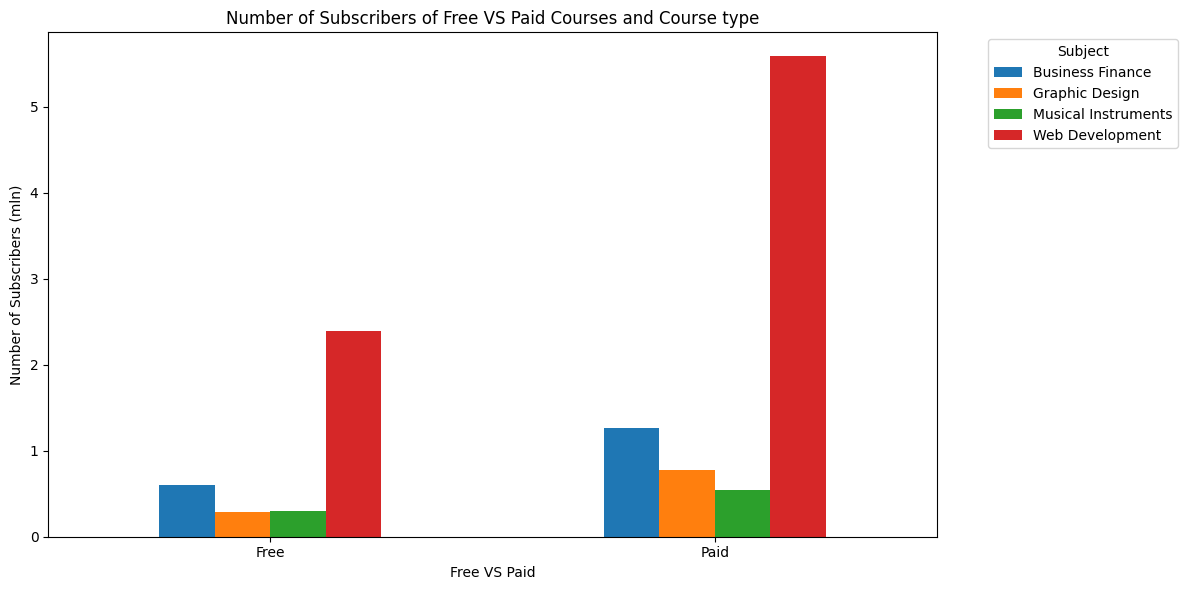

In [273]:
# Grouping by the level of course and subject, then counting the sum of subscribers

grouped_data = all_courses.groupby(['Free/Paid', 'subject'])['num_subscribers'].sum().unstack(fill_value=0)

# Plotting a grouped bar plot
ax = grouped_data.plot(kind='bar', figsize=(12, 6))
plt.title('Number of Subscribers of Free VS Paid Courses and Course type')
plt.xlabel('Free VS Paid')
plt.ylabel('Number of Subscribers (mln)')
plt.xticks(rotation=0)
plt.legend(title='Subject', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x/1000000)))

plt.show()


As we can see, contrasting to a popular belief that free courses are more demanded, from the visualisation above can see that paid courses have more subscribers than free ones for every subject

Now that we know this, let's deepen our research and see the proportion of subscribers for each subject in within categorized prices.

<ipython-input-274-14a0556a11e6>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_courses_p['Price Category'] = all_courses_p['price'].apply(categorize_price)


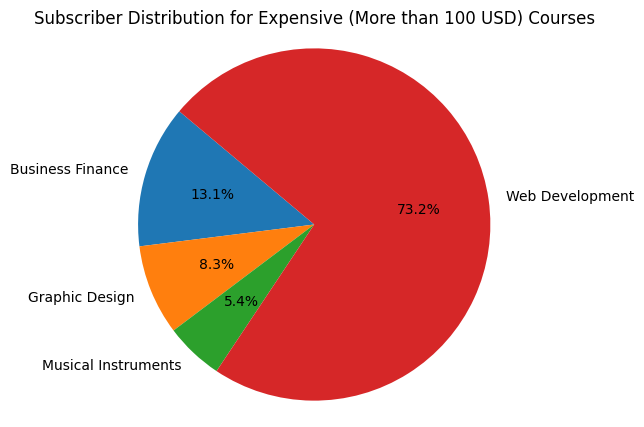

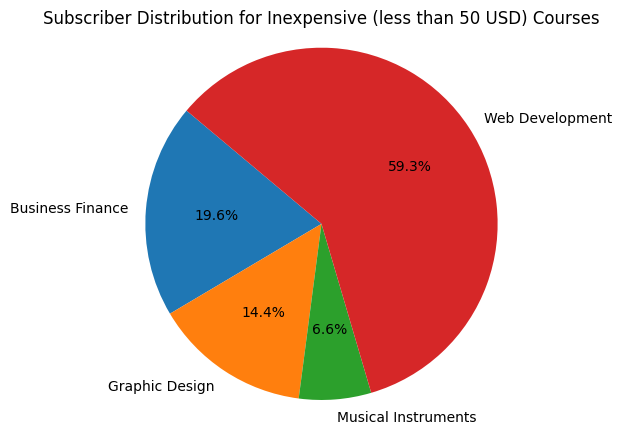

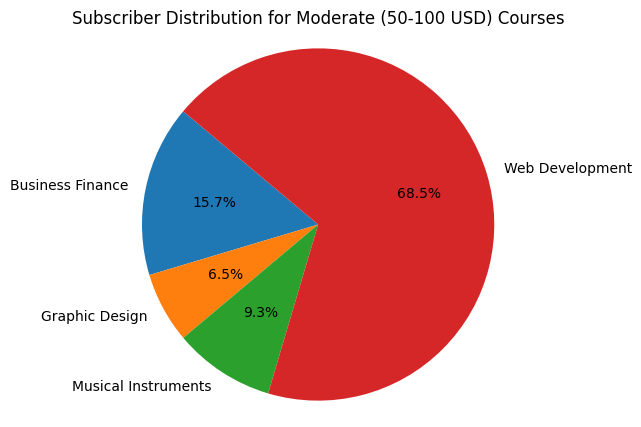

In [274]:
# Define price categories

def categorize_price(price):
    if price < 50:
        return 'Inexpensive (less than 50 USD)'
    elif price < 100:
        return 'Moderate (50-100 USD)'
    else:
        return 'Expensive (More than 100 USD)'

# Apply categorization to create a new column 'Price Category'
all_courses_p['Price Category'] = all_courses_p['price'].apply(categorize_price)

# Grouping by the price category and subject, then counting the sum of subscribers
grouped_data = all_courses_p.groupby(['Price Category', 'subject'])['num_subscribers'].sum()

# Iterate over each price category
for price_category in all_courses_p['Price Category'].unique():
    # Filter data for the current price category
    subset = grouped_data[price_category]

    # Plot a pie chart for the current price category
    plt.figure(figsize=(5, 5))
    plt.pie(subset, labels=subset.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Subscriber Distribution for {price_category} Courses')
    plt.axis('equal')
    plt.show()

<ipython-input-275-1e30d16dfe78>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(['subject', 'price_range']).size().unstack(fill_value=0)


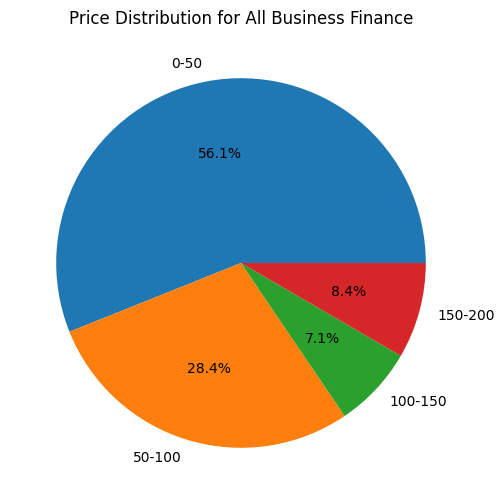

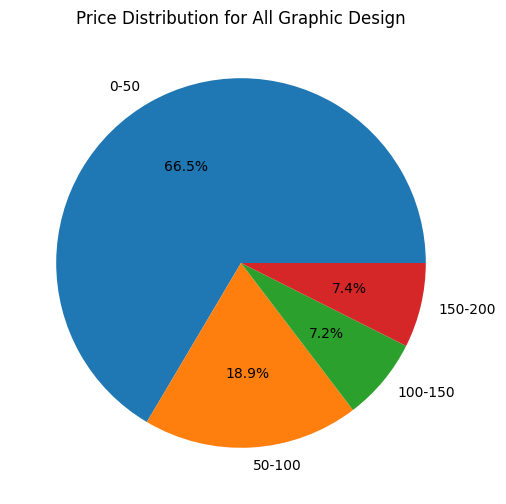

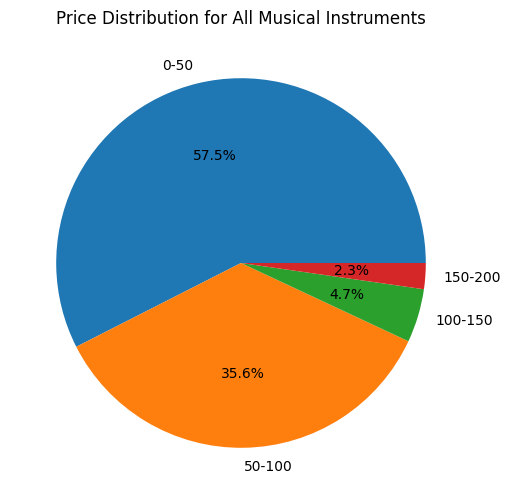

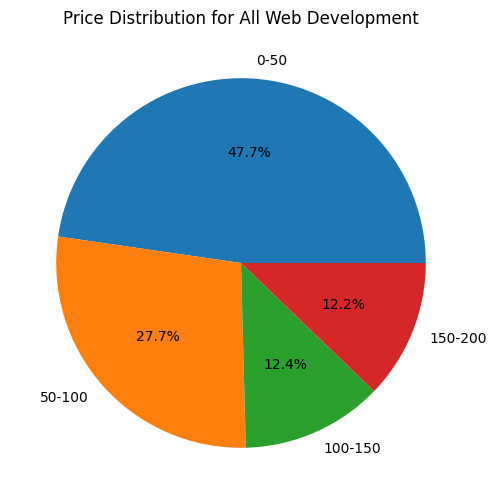

<ipython-input-275-1e30d16dfe78>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price_range'] = pd.cut(data['price'], bins=[0, 50, 100, 150, 200], labels=labels, right=False)
<ipython-input-275-1e30d16dfe78>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(['subject', 'price_range']).size().unstack(fill_value=0)


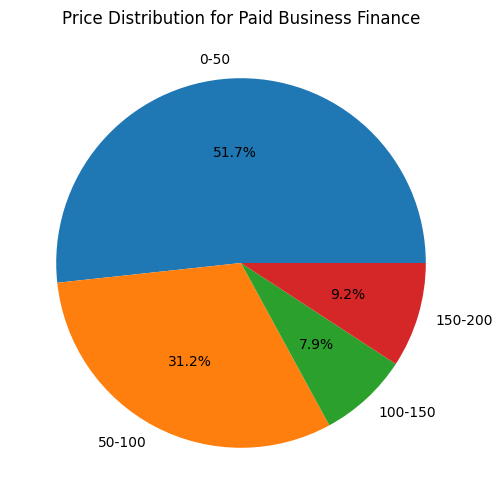

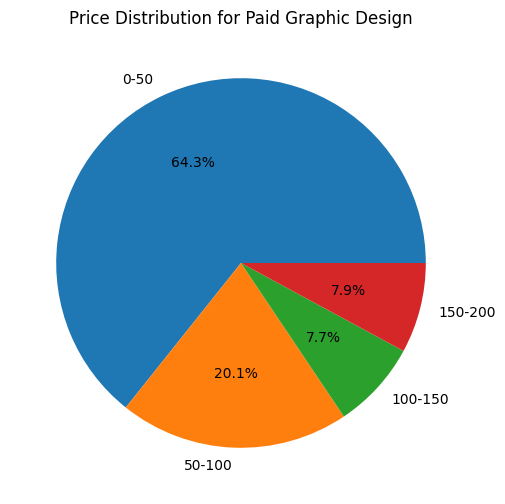

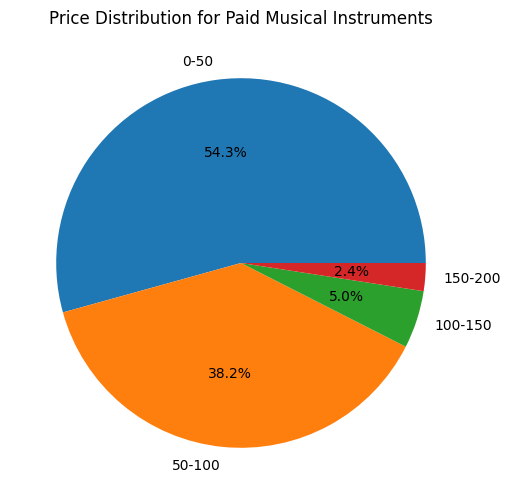

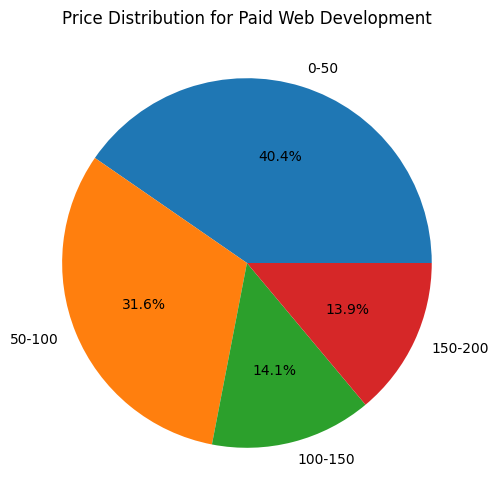

In [275]:
# Grouping price range for each subject

def subject_price_range_for(data, name):
    price_ranges = [(0, 50), (50, 100), (100, 150), (150, 200)]
    labels = ['0-50', '50-100', '100-150', '150-200']

    data['price_range'] = pd.cut(data['price'], bins=[0, 50, 100, 150, 200], labels=labels, right=False)

    # Group by subject and price range, then count the number of occurrences
    grouped_data = data.groupby(['subject', 'price_range']).size().unstack(fill_value=0)

    # Plotting pie charts for each subject
    for subject, data in grouped_data.iterrows():
        plt.figure(figsize=(8, 6))
        plt.pie(data, labels=labels, autopct='%1.1f%%')
        plt.title(f'Price Distribution for {name} {subject}')
        plt.show()

subject_price_range_for(all_courses, "All")
subject_price_range_for(all_courses_p, "Paid")

According to an another popular belief, the price of a course is a good indicator of the how good the course is. To find out if that is the case, we may find the connection between the price of a course and its ratings. To do that...

<Figure size 1000x600 with 0 Axes>

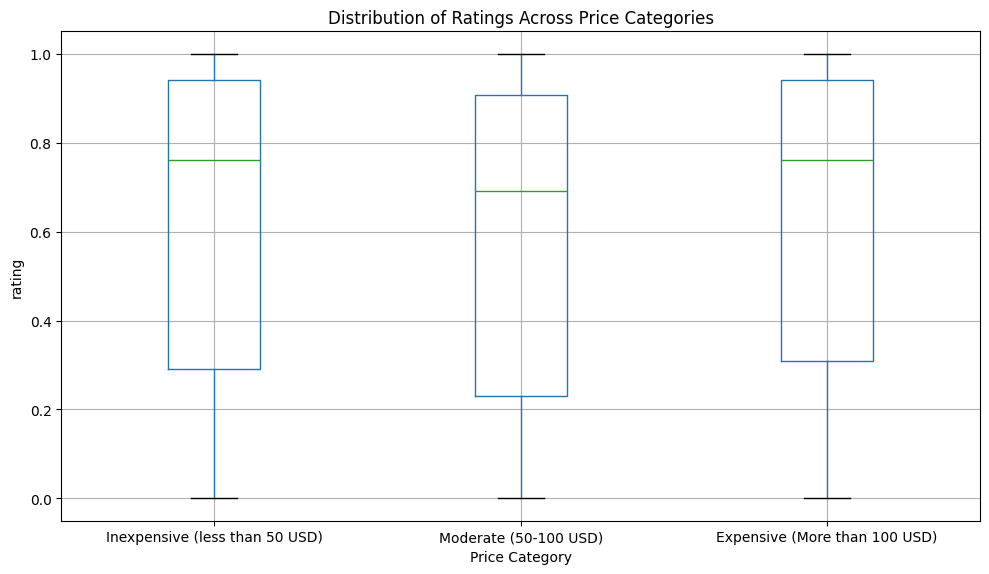

In [276]:
ratings = all_courses_p['rating']
price_categories = all_courses_p['Price Category']

# Mapping price categories to numerical values for sorting purposes
price_mapping = {
    "Inexpensive (less than 50 USD)": 1,
    "Moderate (50-100 USD)": 2,
    "Expensive (More than 100 USD)": 3
}

sorted_price_categories = price_categories.map(price_mapping)

# Creating a DataFrame with ratings and corresponding price categories
data = pd.DataFrame({'rating': ratings, 'Price Category': sorted_price_categories})

# Plotting the box plot
plt.figure(figsize=(10, 6))
boxplot = data.boxplot(by='Price Category', figsize=(10,6))

# Adding labels and title
plt.suptitle('')
plt.xlabel("Price Category")
plt.ylabel("rating")
plt.title("Distribution of Ratings Across Price Categories")

# Renaming x-axis ticks to original price category names
boxplot.set_xticklabels(price_mapping.keys())

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

We are used to seeing courses of higher levels to be more expensive, does this apply to udemy courses?

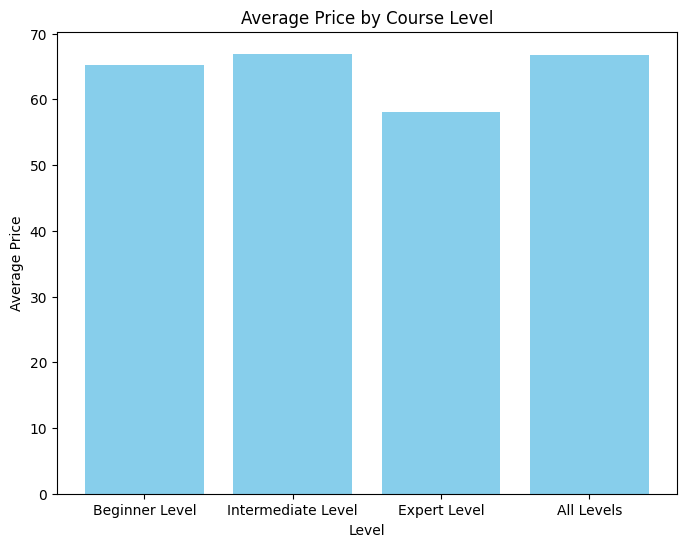

In [277]:
categories = ['Beginner Level', 'Intermediate Level', 'Expert Level', 'All Levels']

# Calculate the average price for each category
average_prices = []
for category in categories:
    average_price = all_courses[all_courses['level'] == category]['price'].mean()
    average_prices.append(average_price)

# Plotting the bar plot
plt.figure(figsize=(8, 6))
plt.bar(categories, average_prices, color='skyblue')
plt.title('Average Price by Course Level')
plt.xlabel('Level')
plt.ylabel('Average Price')
plt.show()

One of the most interesting analysis we can do is about the revenue of this courses.
Let's check how much money each course makes.

In [278]:
# Grouping data by course and summing the revenue for each course
course_revenue = all_courses.groupby('course_title')['revenue'].sum()

# Grouping data by subject and summing the revenue for each subject
subject_revenue = all_courses.groupby('subject')['revenue'].sum()

# Sorting the results in descending order to find the courses and subjects with the highest revenue
top_courses_by_revenue = course_revenue.sort_values(ascending=False).head(10)
top_subjects_by_revenue = subject_revenue.sort_values(ascending=False)

# Displaying the top courses and subjects by revenue
print("Top 10 Courses by Revenue:")
print(top_courses_by_revenue)

print("\nTop Subjects by Revenue:")
print(top_subjects_by_revenue)


Top 10 Courses by Revenue:
course_title
The Web Developer Bootcamp                                      24316800
The Complete Web Developer Course 2.0                           22902400
Pianoforall - Incredible New Way To Learn Piano & Keyboard      15099800
Angular 4 (formerly Angular 2) - The Complete Guide             14018770
JavaScript: Understanding the Weird Parts                       13932100
Learn and Understand NodeJS                                     11350560
The Complete HTML & CSS Course - From Novice To Professional    11197290
Complete PHP Course With Bootstrap3 CMS System & Admin Panel    10789740
Learn and Understand AngularJS                                  10388175
Modern React with Redux                                          9146700
Name: revenue, dtype: int64

Top Subjects by Revenue:
subject
Web Development        631082465
Business Finance       123735315
Graphic Design          76983170
Musical Instruments     53359055
Name: revenue, dtype: int64


Then lets visualize it for better comprehension

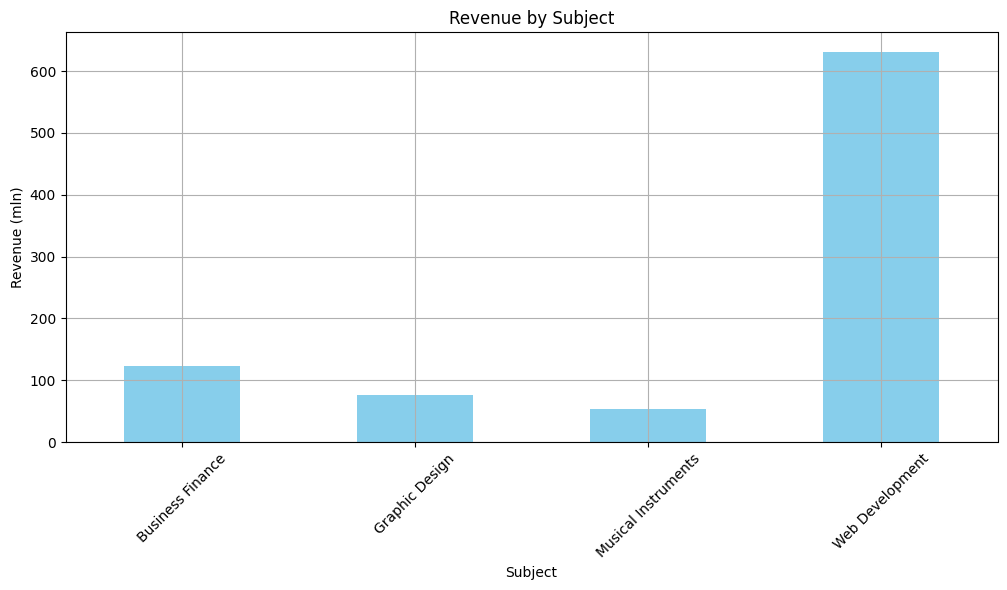

In [279]:
# Calculate revenue for each course
all_courses['revenue'] = all_courses['price'] * all_courses['num_subscribers']

# Grouping data by subject and summing the revenue for each subject
subject_revenue = all_courses.groupby('subject')['revenue'].sum()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
ax = subject_revenue.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel("Subject")
plt.ylabel("Revenue (mln)")
plt.title("Revenue by Subject")

# Display the plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x/1000000)))
plt.show()


Average prices of each subject

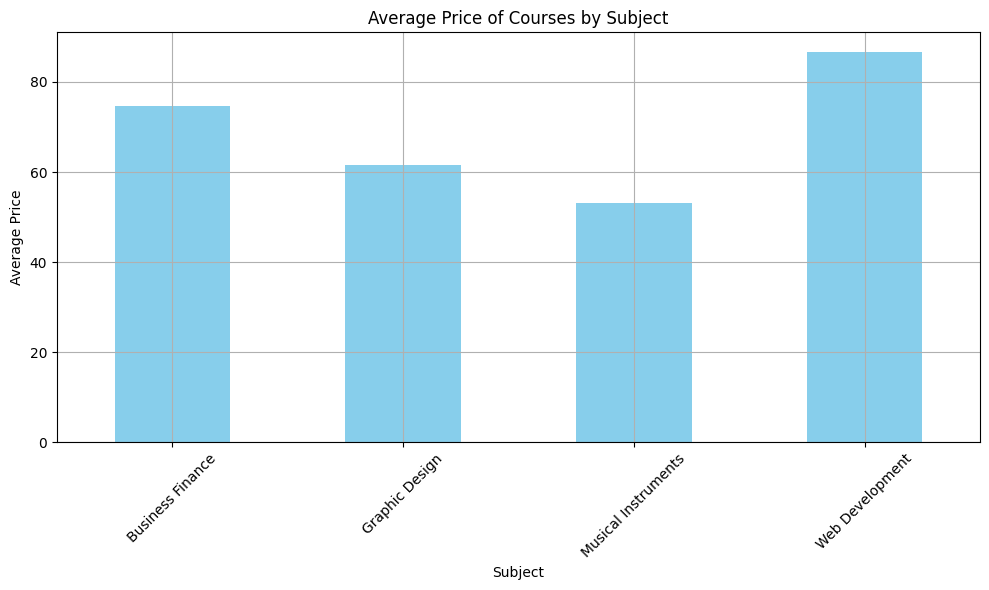

In [280]:
# Grouping data by subject and calculating the average price for each subject
average_price_by_subject = all_courses_p.groupby('subject')['price'].mean()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
average_price_by_subject.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel("Subject")
plt.ylabel("Average Price")
plt.title("Average Price of Courses by Subject")

# Display the plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# custom label for average rating on bars

Same with box plot to show 25th, 75th percentiles

<Figure size 1000x600 with 0 Axes>

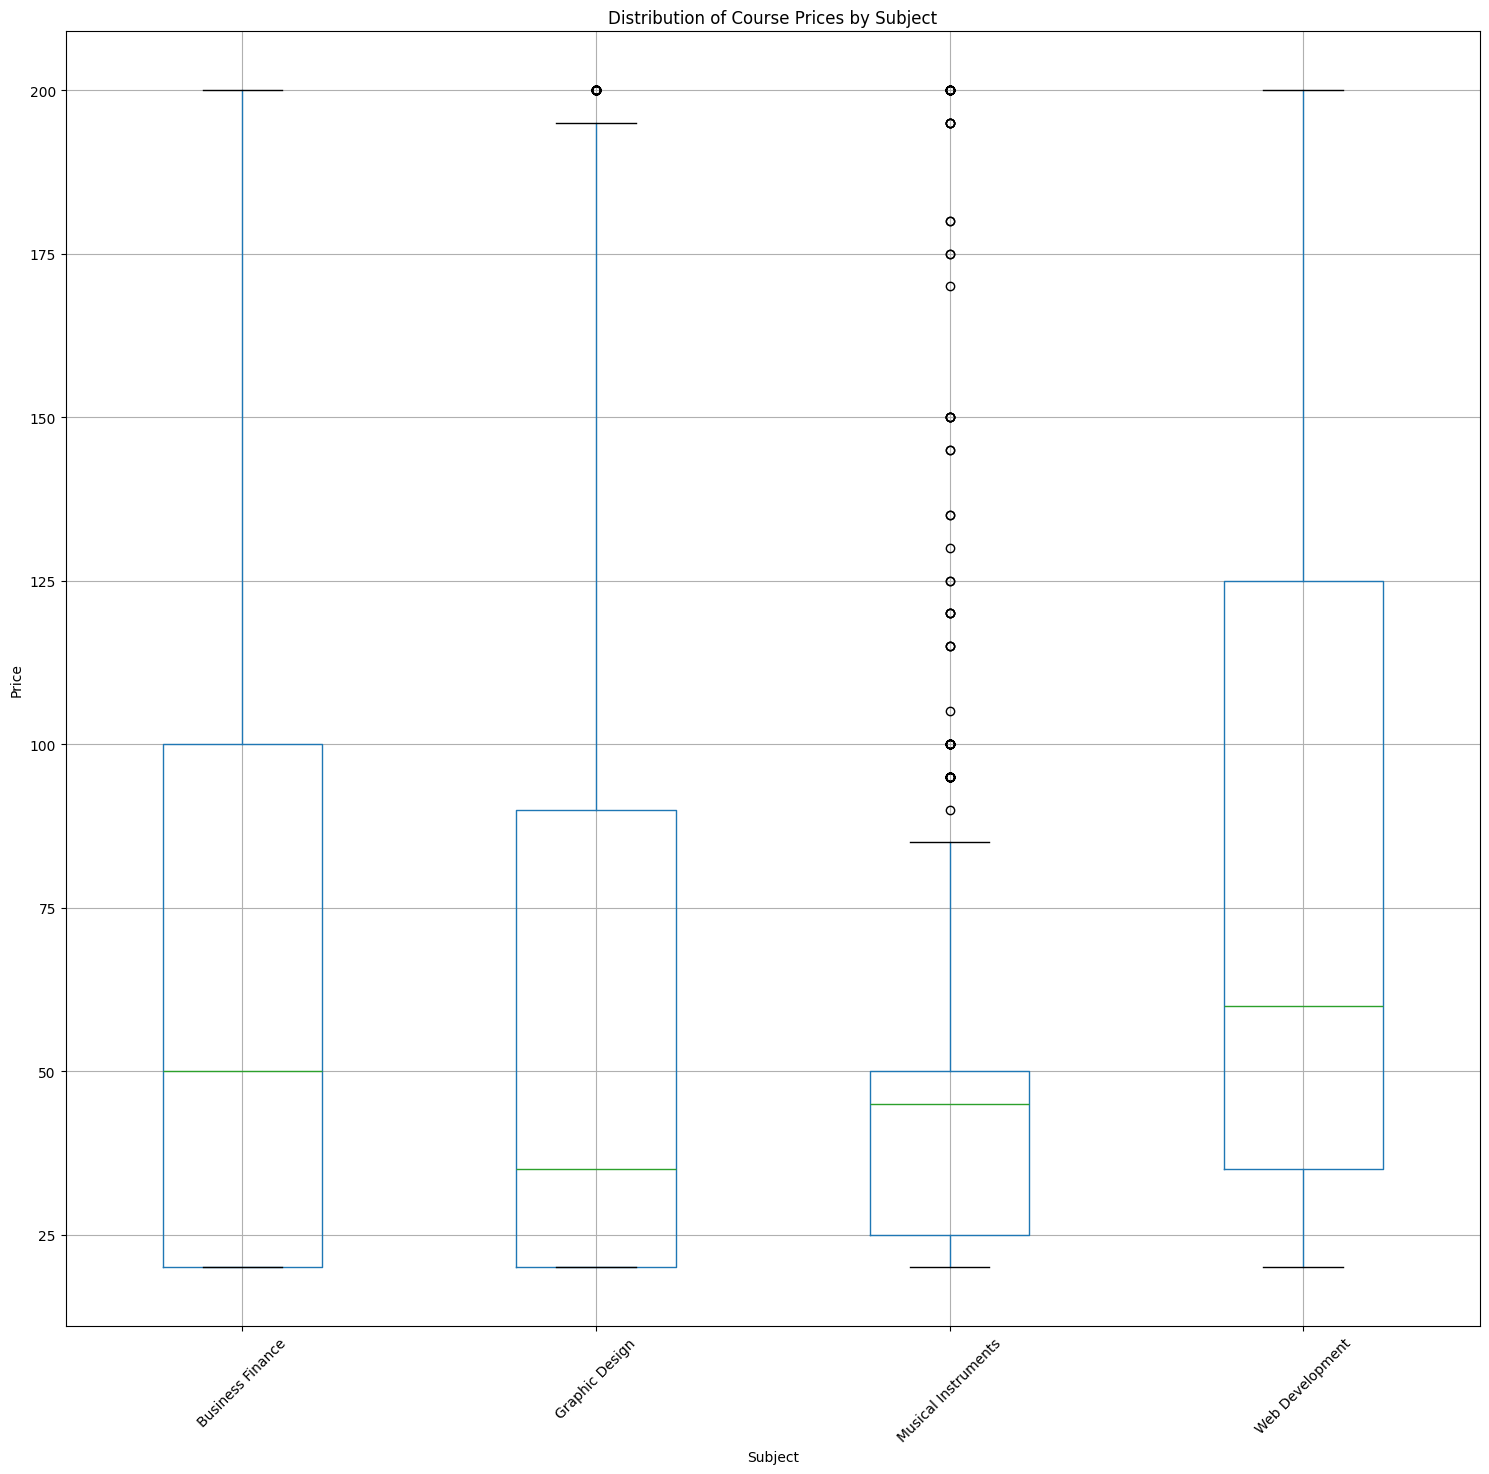

In [281]:
# Plotting the box plot
plt.figure(figsize=(10, 6))
boxplot = all_courses_p.boxplot(column='price', by='subject', grid=False, figsize=(15,15))

# Adding labels and title
plt.suptitle('')
plt.xlabel("Subject")
plt.ylabel("Price")
plt.title("Distribution of Course Prices by Subject")

# Display the plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [282]:
all_courses.head()

course_title  price  num_subscribers  \
0               Learn HTML5 Programming From Scratch      0           268923   
1                     Coding for Entrepreneurs Basic      0           161029   
2                         The Web Developer Bootcamp    200           121584   
3  Build Your First Website in 1 Week with HTML5 ...      0           120291   
4              The Complete Web Developer Course 2.0    200           114512   

   num_reviews  num_lectures           level  rating  content_duration  \
0         8629            45  Beginner Level    0.82              10.5   
1          279            27    Expert Level    0.69               3.5   
2        27445           342  Beginner Level    0.89              43.0   
3         5924            30      All Levels    0.78               3.0   
4        22412           304  Beginner Level    0.55              30.5   

        published_timestamp          subject        Date Free/Paid  \
0 2013-02-14 07:03:41+00:00  Web Development  2013-02-14      Free   
1 2013-06-09 15:51:55+00:00  Web Development  2013-06-09      Free   
2 2015-11-02 21:13:27+00:00  Web Development  2015-11-02      Paid   
3 2014-04-08 16:21:30+00:00  Web Development  2014-04-08      Free   
4 2016-03-08 22:28:36+00:00  Web Development  2016-03-08      Paid   

   published_year   revenue price_range  
0            2013         0        0-50  
1            2013         0        0-50  
2            2015  24316800         NaN  
3            2014         0        0-50  
4            2016  22902400         NaN

Another interesting analysis, in which month there are more subscribers

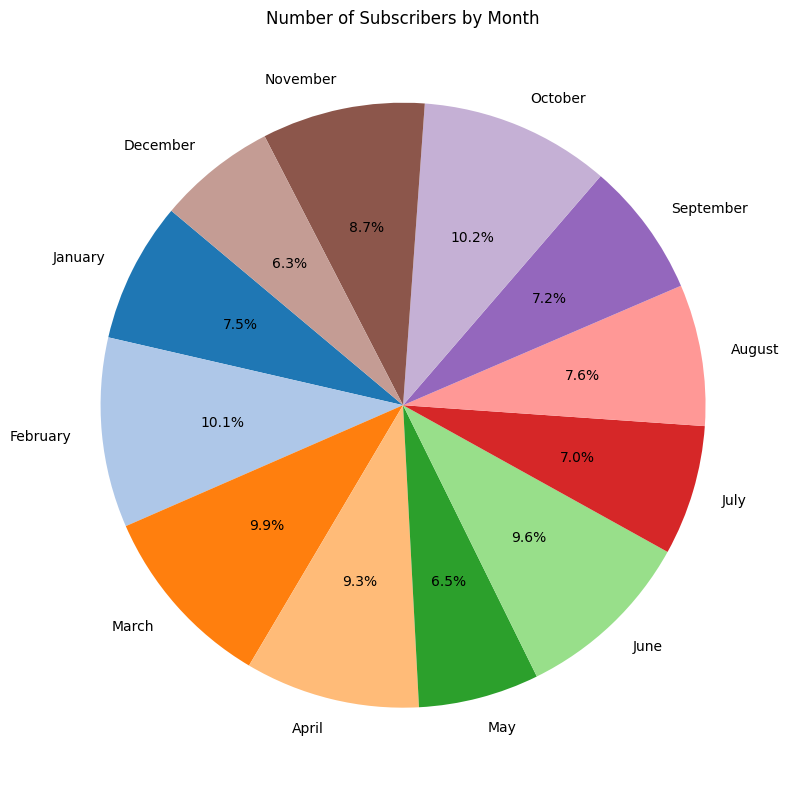

In [283]:
# Extracting the month from the published timestamp
all_courses['published_month'] = pd.to_datetime(all_courses['published_timestamp']).dt.month

# Grouping data by month and calculating the total number of subscribers for each month
subscribers_per_month = all_courses.groupby('published_month')['num_subscribers'].sum()

# Getting month names
month_names = [calendar.month_name[i] for i in subscribers_per_month.index]

# Plotting the pie plot
plt.figure(figsize=(8, 8))
plt.pie(subscribers_per_month, labels=month_names, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)

# Adding title
plt.title("Number of Subscribers by Month")

# Display the plot
plt.axis('equal')
plt.tight_layout()
plt.show()

each slice represents the number of subscribers in each month. Here is also the analysis for paid courses.

<ipython-input-284-771f8a79a2fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_courses_p['published_month'] = pd.to_datetime(all_courses['published_timestamp']).dt.month


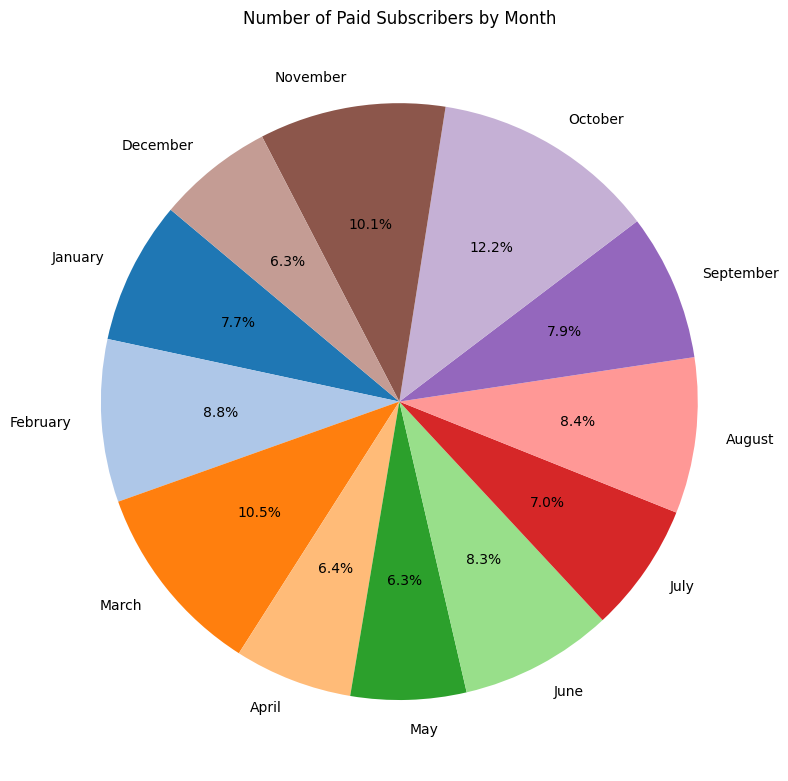

In [284]:
# Grouping data by month and calculating the total number of paid subscribers for each month
all_courses_p['published_month'] = pd.to_datetime(all_courses['published_timestamp']).dt.month

subscribers_per_month = all_courses_p.groupby('published_month')['num_subscribers'].sum()

# Getting month names
month_names = [calendar.month_name[i] for i in subscribers_per_month.index]

# Plotting the pie plot
plt.figure(figsize=(8, 8))
plt.pie(subscribers_per_month, labels=month_names, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)

# Adding title
plt.title("Number of Paid Subscribers by Month")

# Display the plot
plt.axis('equal')
plt.tight_layout()
plt.show()

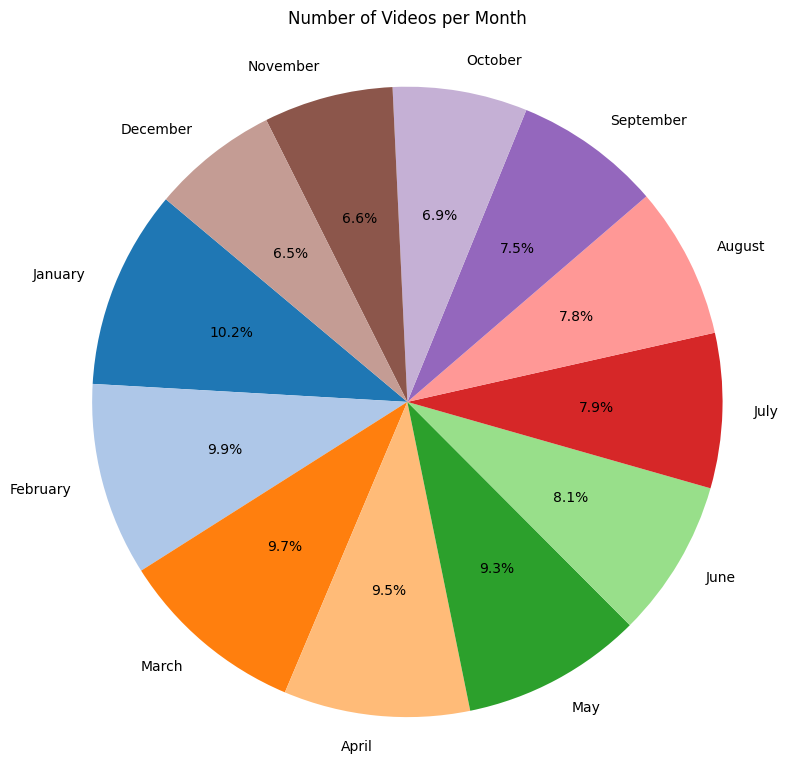

In [285]:
video_counts = all_courses['published_month'].value_counts()

# Getting month names
month_names = [calendar.month_name[i] for i in subscribers_per_month.index]

# Plotting the pie plot
plt.figure(figsize=(8, 8))
plt.pie(video_counts, labels=month_names, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)

# Adding title
plt.title("Number of Videos per Month")

# Display the plot
plt.axis('equal')
plt.tight_layout()

plt.show()

What proportion of courses each month has.

Let's find out the most used words according to the top subscribers and top revenues for each subject.

Words for 30 top courses with highest revenue


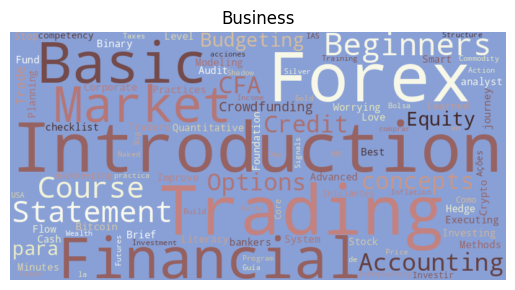

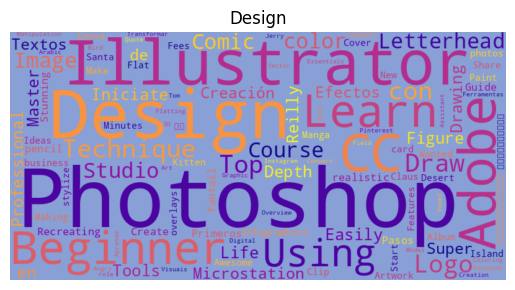

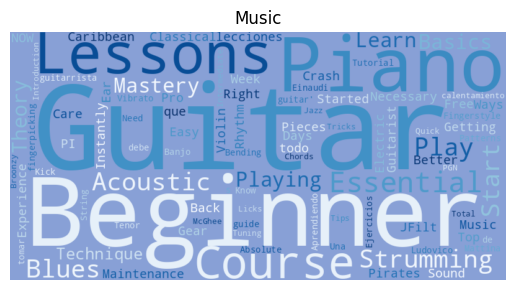

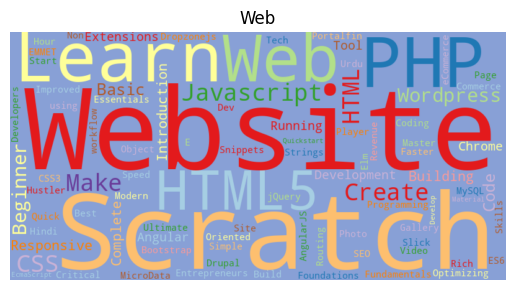

Words for 30 top courses with highest subscribers


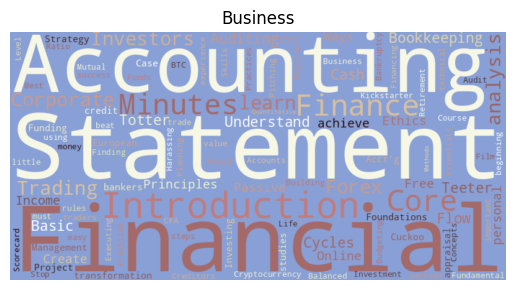

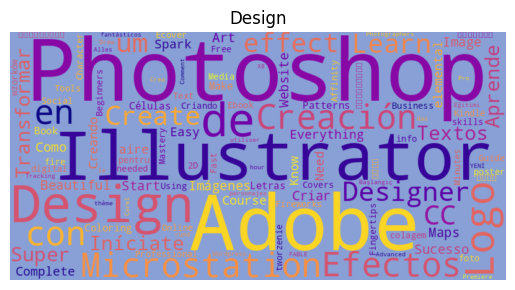

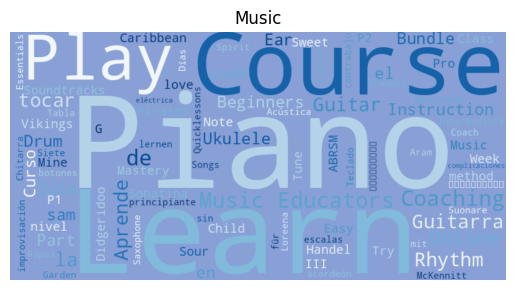

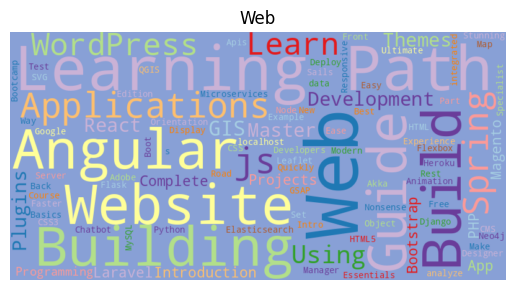

In [286]:
def most_used_words_for(data, by_column, color, top, name):

    data = data.sort_values(by = by_column)
    data = data.head(top)
    data_text = ' '.join(names for names in data['course_title'])

    wordcloud_data = WordCloud(height = 400, width = 800, stopwords = STOPWORDS, colormap = color, background_color = "#88A0D6").generate(data_text)
    plt.imshow(wordcloud_data, interpolation='bilinear')
    plt.axis("off")
    plt.title(name)
    plt.show()

#which words bring more revenue in top 30
print("Words for 30 top courses with highest revenue")

most_used_words_for(business, "revenue", "pink", 30, "Business")
most_used_words_for(design, "revenue", "plasma", 30, "Design")
most_used_words_for(music, "revenue", "Blues", 30, "Music")
most_used_words_for(web, "revenue", "Paired", 30, "Web")

# to see which words bring more subscribers in top 30
print("Words for 30 top courses with highest subscribers")

most_used_words_for(business, "num_subscribers", "pink", 30, "Business")
most_used_words_for(design, "num_subscribers", "plasma", 30, "Design")
most_used_words_for(music, "num_subscribers", "Blues", 30, "Music")
most_used_words_for(web, "num_subscribers", "Paired", 30, "Web")